In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# Import Data

In [2]:
## Adding of supplementary python packages/modules for next cells
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
dfs = [('train', df_train),('test', df_test)]
df = pd.concat([df_train,df_test],axis = 0).reset_index(drop = True)

# Variables Identification and Typecasting

In [5]:
for e in dfs:
    print('Shape_{} :{}\n'.format(e[0],e[1].shape))

Shape_train :(20758, 18)

Shape_test :(13840, 17)



In [6]:
#Null values and types in data
print('\t'+' Data{Length: '+str(df.shape)+'} \n')
nb = pd.Series(df.isna().sum(),name ='NaN_cnt')
pr = pd.Series(df.isna().sum()/len(df),name='NaN_%')
display(pd.concat([nb,pr],axis =1))
print('\n')
cols = df.columns.tolist()
data_types =[]
for i in cols:
    data_types.append({i:type(df[i].loc[0])})
display(data_types)

	 Data{Length: (34598, 18)} 



NaN_cnt     NaN_%
id                                    0  0.000000
Gender                                0  0.000000
Age                                   0  0.000000
Height                                0  0.000000
Weight                                0  0.000000
family_history_with_overweight        0  0.000000
FAVC                                  0  0.000000
FCVC                                  0  0.000000
NCP                                   0  0.000000
CAEC                                  0  0.000000
SMOKE                                 0  0.000000
CH2O                                  0  0.000000
SCC                                   0  0.000000
FAF                                   0  0.000000
TUE                                   0  0.000000
CALC                                  0  0.000000
MTRANS                                0  0.000000
NObeyesdad                        13840  0.400023

[{'id': numpy.int64},
 {'Gender': str},
 {'Age': numpy.float64},
 {'Height': numpy.float64},
 {'Weight': numpy.float64},
 {'family_history_with_overweight': str},
 {'FAVC': str},
 {'FCVC': numpy.float64},
 {'NCP': numpy.float64},
 {'CAEC': str},
 {'SMOKE': str},
 {'CH2O': numpy.float64},
 {'SCC': str},
 {'FAF': numpy.float64},
 {'TUE': numpy.float64},
 {'CALC': str},
 {'MTRANS': str},
 {'NObeyesdad': str}]

In [7]:
df.nunique().sort_values(ascending= False )

id                                34598
Weight                             2318
Height                             2070
Age                                1934
CH2O                               1734
FAF                                1539
TUE                                1436
FCVC                               1054
NCP                                 793
NObeyesdad                            7
MTRANS                                5
CALC                                  4
CAEC                                  4
SMOKE                                 2
Gender                                2
SCC                                   2
FAVC                                  2
family_history_with_overweight        2
dtype: int64

### Summary of quick content observation
> #### Columns content

There is no details on each columns. The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. 
The target is the `NObeyesdad` which indicate the category of obesity risk.

> #### Assessing data

This dataset looks pretty clean.But I will convert all string colums into category for easy EDA on these variable in next cells. So `NObeyesdad`, `MTRANS`,`CALC`, `CAEC`, `SMOKE`, `Gender`, `SCC`, `FAVC`, `family_history_with_overweight` will be converted to category type.
I will create new variables depending of age range (children, adults, teenages, elders,)

>  #### Missing values

There is no missing values in dataset. Normal to not have the target in test dataset.

# Data Cleaning

In [8]:
data = df.copy()
col_to_category = ['NObeyesdad', 'MTRANS','CALC', 'CAEC', 'SMOKE', 'Gender', 'SCC', 'FAVC', 'family_history_with_overweight']
for col in col_to_category:
    data[col] = data[col].astype('category')
data.dtypes

id                                   int64
Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object

In [9]:
data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [10]:
data.nunique().sort_values(ascending=False)

id                                34598
Weight                             2318
Height                             2070
Age                                1934
CH2O                               1734
FAF                                1539
TUE                                1436
FCVC                               1054
NCP                                 793
NObeyesdad                            7
MTRANS                                5
CALC                                  4
CAEC                                  4
SMOKE                                 2
Gender                                2
SCC                                   2
FAVC                                  2
family_history_with_overweight        2
dtype: int64

The `id` column is not informative for us. So I will drop it.

In [11]:
data_f = data.drop(columns=['id'])
data_f.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object

# EDA (Exploratory Data analysis)

## Univariate Analysis : Numerical variables

In [12]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [13]:
#Segregating variables into groups
num_vars = ['Age', 'Height', 'Weight', 'NCP', 'FCVC','CH2O','FAF', 'TUE']
#All numerical variables are continuous here , let's add new integer variables for more insights
#These variables will concern Age, Height and Weight
data['Age_round'] = data['Age'].astype(int)
data['Height_round'] = data['Height'].apply(lambda x: round(x,2))
data['Weight_round'] = data['Weight'].apply(lambda x: round(x,1))
num_vars_dis = ['Age_round','Height_round','Weight_round']


In [14]:
def UVA_numeric_discrete(data, var_group):
    '''
    Univariate analysis numeric for discrete variables here that concerns only new previous added variables
    Takes a group of variables ( INTEGER or FLOAT) and plot/print all the descriptives and properties along with KDE
    '''
    size = len(var_group)
    fig, ax = plt.subplots(size,2, figsize = [11*size,20])
    
    #looping for each variable
    for j,i in enumerate(var_group):
        
        #computing descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calculating points of standard deviation
        points = mean - st_dev, mean + st_dev
        
        #Plotting the variable with every information

        sb.kdeplot(ax = ax[j,0], x = data[i],shade = True)
        sb.lineplot(ax = ax[j,0],x = points,y=[0,0], color = 'black',label = 'std_dev')
        sb.scatterplot(ax=ax[j,0],x = [mini, maxi],y = [0,0],color='orange',label = 'min/max')
        sb.scatterplot(ax=ax[j,0],x = [mean],y = [0], color = 'red',label = "mean")
        sb.scatterplot(ax=ax[j,0],x = [median],y = [0], color = 'blue',label = "median")
        ax[j,0].set_xlabel('{}'.format(i),fontsize = 20)
        ax[j,0].set_ylabel('density')
        ax[j,0].set_title('1 std_dev = {}; kurtosis = {}; \nskew ={}; range = {} \nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                                round(kurt,2),
                                                                                                                round(skew,2),
                                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                                round(mean,2),
                                                                                                                round(median,2)))
                  
    
        base_cl = sb.color_palette()[0]
        pickp_data = data[i].value_counts(ascending=False)
        sb.countplot(data,x = i, color = base_cl,order = pickp_data.index,ax= ax[j,1])
        ax[j,1].set_xlabel('{}'.format(i),fontsize = 20)
        ax[j,1].set_ylabel('Count')
        #plt.legend(ncol = 2) # re-arrange legend to reduce overlapping"""
        plt.tight_layout(pad =2)
        

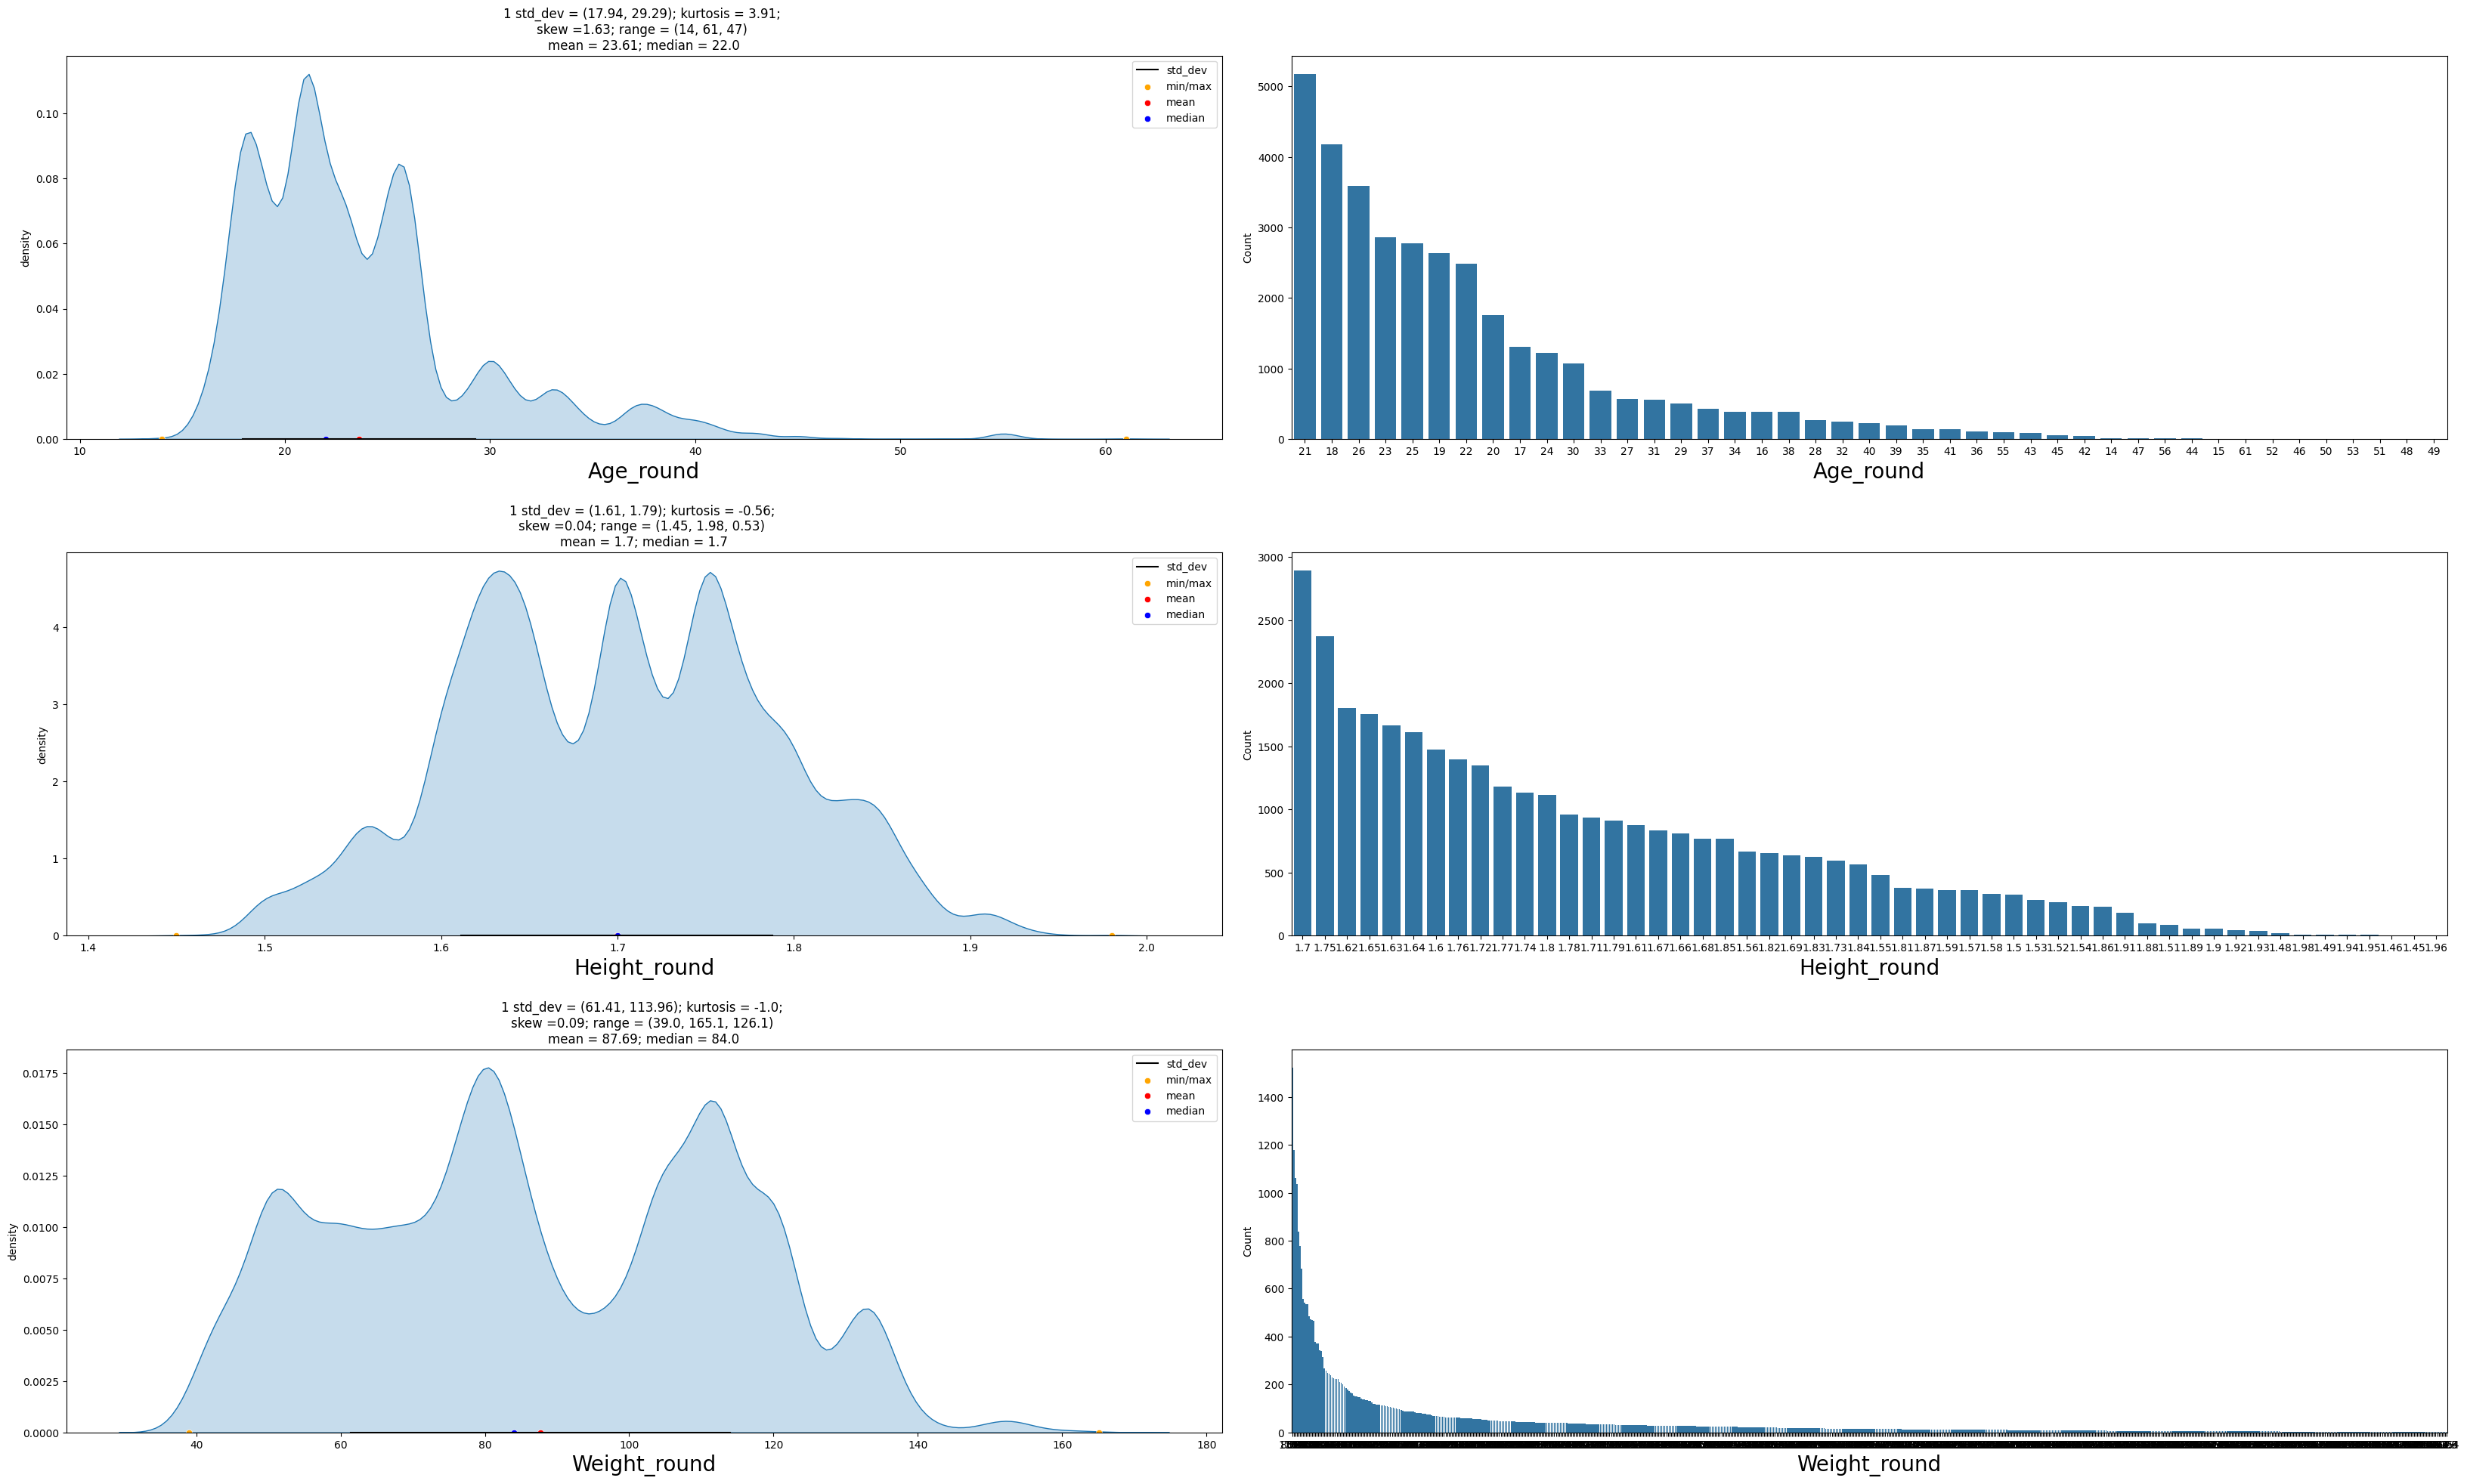

In [15]:
UVA_numeric_discrete(data, num_vars_dis)

> #### Summary of basic features :Age, Weight and Height

- Most of patients are between ** 18 and 26 years olds** and 23 in average. So most young peoples. 
- Most of patients are **1.7 height** and about 88 kg in average.
The kurtosis regarding age indicate that we could likely to have extreme/outlier values.

**Things to investigate further down:**
* There are some picks on age density plot, on elders side. New categories regarding type or category of patient might surely help us to understand.

In [16]:
def UVA_numeric_continuous(data, var_group):
    '''
    Univariate analysis numeric for continuous variables
    Takes a group of variables ( INTEGER or FLOAT) and plot/print all the descriptives and properties along with KDE and histograms
    '''
    size = len(var_group)
    fig, ax = plt.subplots(size,2, figsize = [11*size,120])
    
    #looping for each variable
    for j,i in enumerate(var_group):
        
        #computing descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calculating points of standard deviation
        points = mean - st_dev, mean + st_dev
        
        #Plotting the variable with every information

        sb.kdeplot(ax = ax[j,0], x = data[i],shade = True)
        sb.lineplot(ax = ax[j,0],x = points,y=[0,0], color = 'black',label = 'std_dev')
        sb.scatterplot(ax=ax[j,0],x = [mini, maxi],y = [0,0],color='orange',label = 'min/max')
        sb.scatterplot(ax=ax[j,0],x = [mean],y = [0], color = 'red',label = "mean")
        sb.scatterplot(ax=ax[j,0],x = [median],y = [0], color = 'blue',label = "median")
        ax[j,0].set_xlabel('{}'.format(i),fontsize = 20)
        ax[j,0].set_ylabel('density')
        ax[j,0].set_title('1 std_dev = {}; kurtosis = {}; \nskew ={}; range = {} \nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                                round(kurt,2),
                                                                                                                round(skew,2),
                                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                                round(mean,2),
                                                                                                                round(median,2)))
                  
    
        base_cl = sb.color_palette()[0]
        pickp_data = data[i].value_counts(ascending=False)
        sb.histplot(data,x = i, color = base_cl,ax= ax[j,1])
        ax[j,1].set_xlabel('{}'.format(i),fontsize = 20)
        #plt.legend(ncol = 2) # re-arrange legend to reduce overlapping"""
        plt.tight_layout(pad =2)


In [17]:
UVA_numeric_continuous(data,num_vars)

In [18]:
data[num_vars].describe()

Age        Height        Weight           NCP          FCVC  \
count  34598.000000  34598.000000  34598.000000  34598.000000  34598.000000   
mean      23.886181      1.699721     87.686451      2.757043      2.444704   
std        5.733207      0.087895     26.273493      0.707610      0.532568   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      3.000000      2.000000   
50%       22.851747      1.700000     84.000000      3.000000      2.392179   
75%       26.000000      1.761773    111.539494      3.000000      3.000000   
max       61.000000      1.980000    165.057269      4.000000      3.000000   

               CH2O           FAF           TUE  
count  34598.000000  34598.000000  34598.000000  
mean       2.030469      0.978861      0.614467  
std        0.609566      0.839122      0.604475  
min        1.000000      0.000000      0.000000  
25%        1.784710      0.006892      0.000000  
50%        2.000000      1.000000      0.555591  
75%        2.550570      1.583832      1.000000  
max        3.000000      3.000000      2.000000

Nothing particular to add about the others variables. 

## Univariate analysis : Categorical variables 

Let's add new categories by clustering the age range.

In [19]:
data['patient_class'] = 'to_fill'
data['patient_class'][(data['Age'] <= 14.99) ] = 'Chlid'
data['patient_class'][(data['Age'] >=15.0)& (data['Age'] <= 24.99) ] = 'Teenager'
data['patient_class'][(data['Age'] >=25.0)& (data['Age'] <= 64.99) ] = 'Adult'
data['patient_class'][(data['Age']>=65.00)] = 'Elders'
data['patient_class'] = data['patient_class'].astype('category')

data.select_dtypes(exclude = ['int64','float64','Int64']).dtypes



Gender                            category
family_history_with_overweight    category
FAVC                              category
CAEC                              category
SMOKE                             category
SCC                               category
CALC                              category
MTRANS                            category
NObeyesdad                        category
patient_class                     category
dtype: object

In [20]:
def UVA_category(data, var_group, max_categories=10):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,60), dpi=100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)[:max_categories]
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(5,2,j+1)
        color_base = sb.color_palette()[0]
        sb.barplot(x=norm_count, y=norm_count.index , order=norm_count.index, color = color_base)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel(f'{i}', fontsize = 20)
        plt.title(f'n_uniques = {n_uni} \n value counts \n {norm_count}')
        plt.tight_layout(pad=3)

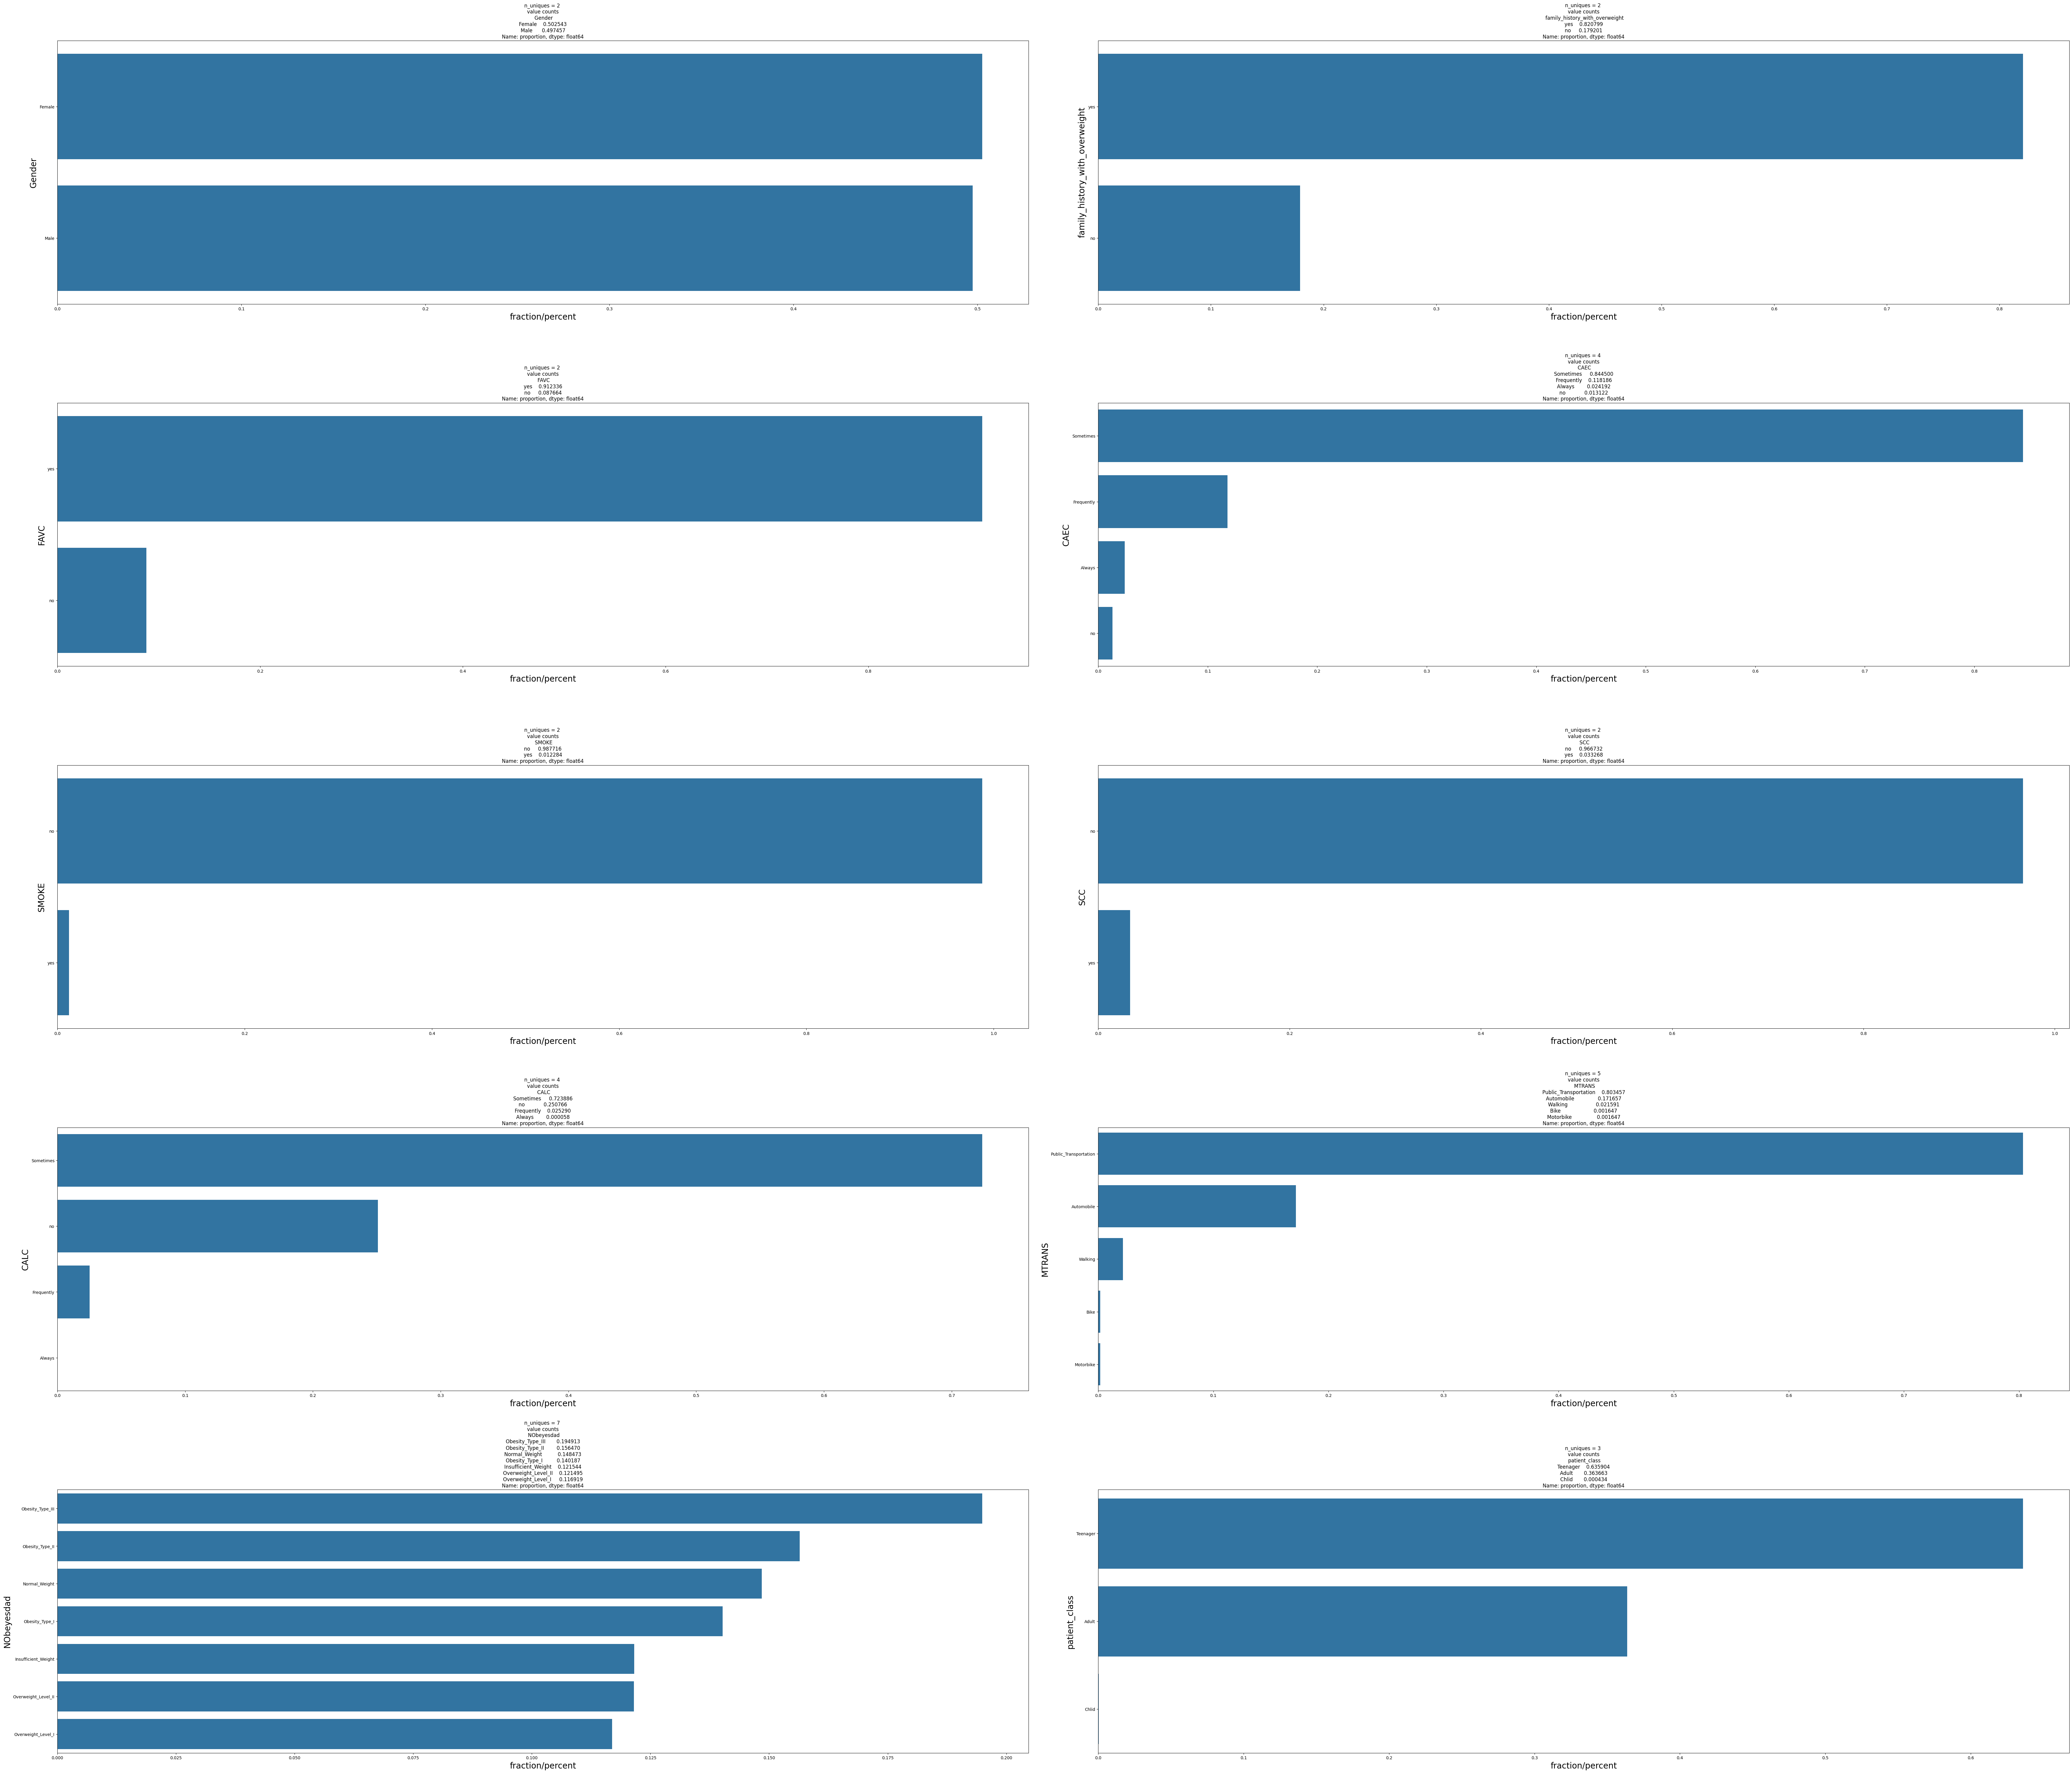

In [21]:
UVA_category(data,['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad','patient_class'])

> #### Summary of categorical variables:

**Gender**
* The data is quite balanced on male and female patient number.

**family_history_with_overweight**
* Most of patients have overweighted people in their family history (more than 80% of patients in dataset).

**SMOKE**
* Most of patients in data don't smoke.

**MTRANS**
* Most of patients use public transportation and automobile to moove.

**NObeyedad**
* Most of patients here have a tag of Obesity_type_III and Obesity_type_II. 

**Patients class**
* Most of patients are teenagers followed by adults. Very few children in data.(not significant number)



## Univariate Analysis: Outliers

Let's check if there is significant number of outliers. 

In [22]:
print(len(num_vars))
num_vars

8


['Age', 'Height', 'Weight', 'NCP', 'FCVC', 'CH2O', 'FAF', 'TUE']

In [23]:
def UVA_outlier(data, var_group,include_outliers=True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives
    Runs a loop: calculate all the descriptives of i-th variable and plot/print it

    data : dataframe from which to plot from
    var_group : [list] Group of Continuous variables
    include_outlier : [bool] whether to include outliers or not, default = True
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4*12), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = round(data[i].quantile(q = 0.25), 2)
        quant75 = round(data[i].quantile(q= 0.75), 2)
        IQR = round(quant75 - quant25, 2)
        med = round(data[i].median(), 2)
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])
        
        if include_outliers == True:
            #Plotting the variable with every information
            plt.subplot(4,2,j+1)
            sb.boxplot(data=data[i], orient="v")
            plt.ylabel(f'{i}')
            plt.title(f'With Outliers\nIQR = {IQR}; Median = {med}\n 1st,3rd quartile = {quant25, quant75};\n Outliers(low/high) = {(outlier_low,outlier_high)}')
            plt.tight_layout(pad=3)
      
        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high
            data2[i][data2[i]<whis_low] = whis_low

            # plotting without outliers
            plt.subplot(4,2,j+1)
            sb.boxplot(data=data2[i], orient="v")
            plt.ylabel(f'{i}')
            plt.title(f'Without Outliers\nIQR = {IQR}; Median = {med}\n 1st,3rd quartile = {quant25, quant75}')
            plt.tight_layout(pad=3)

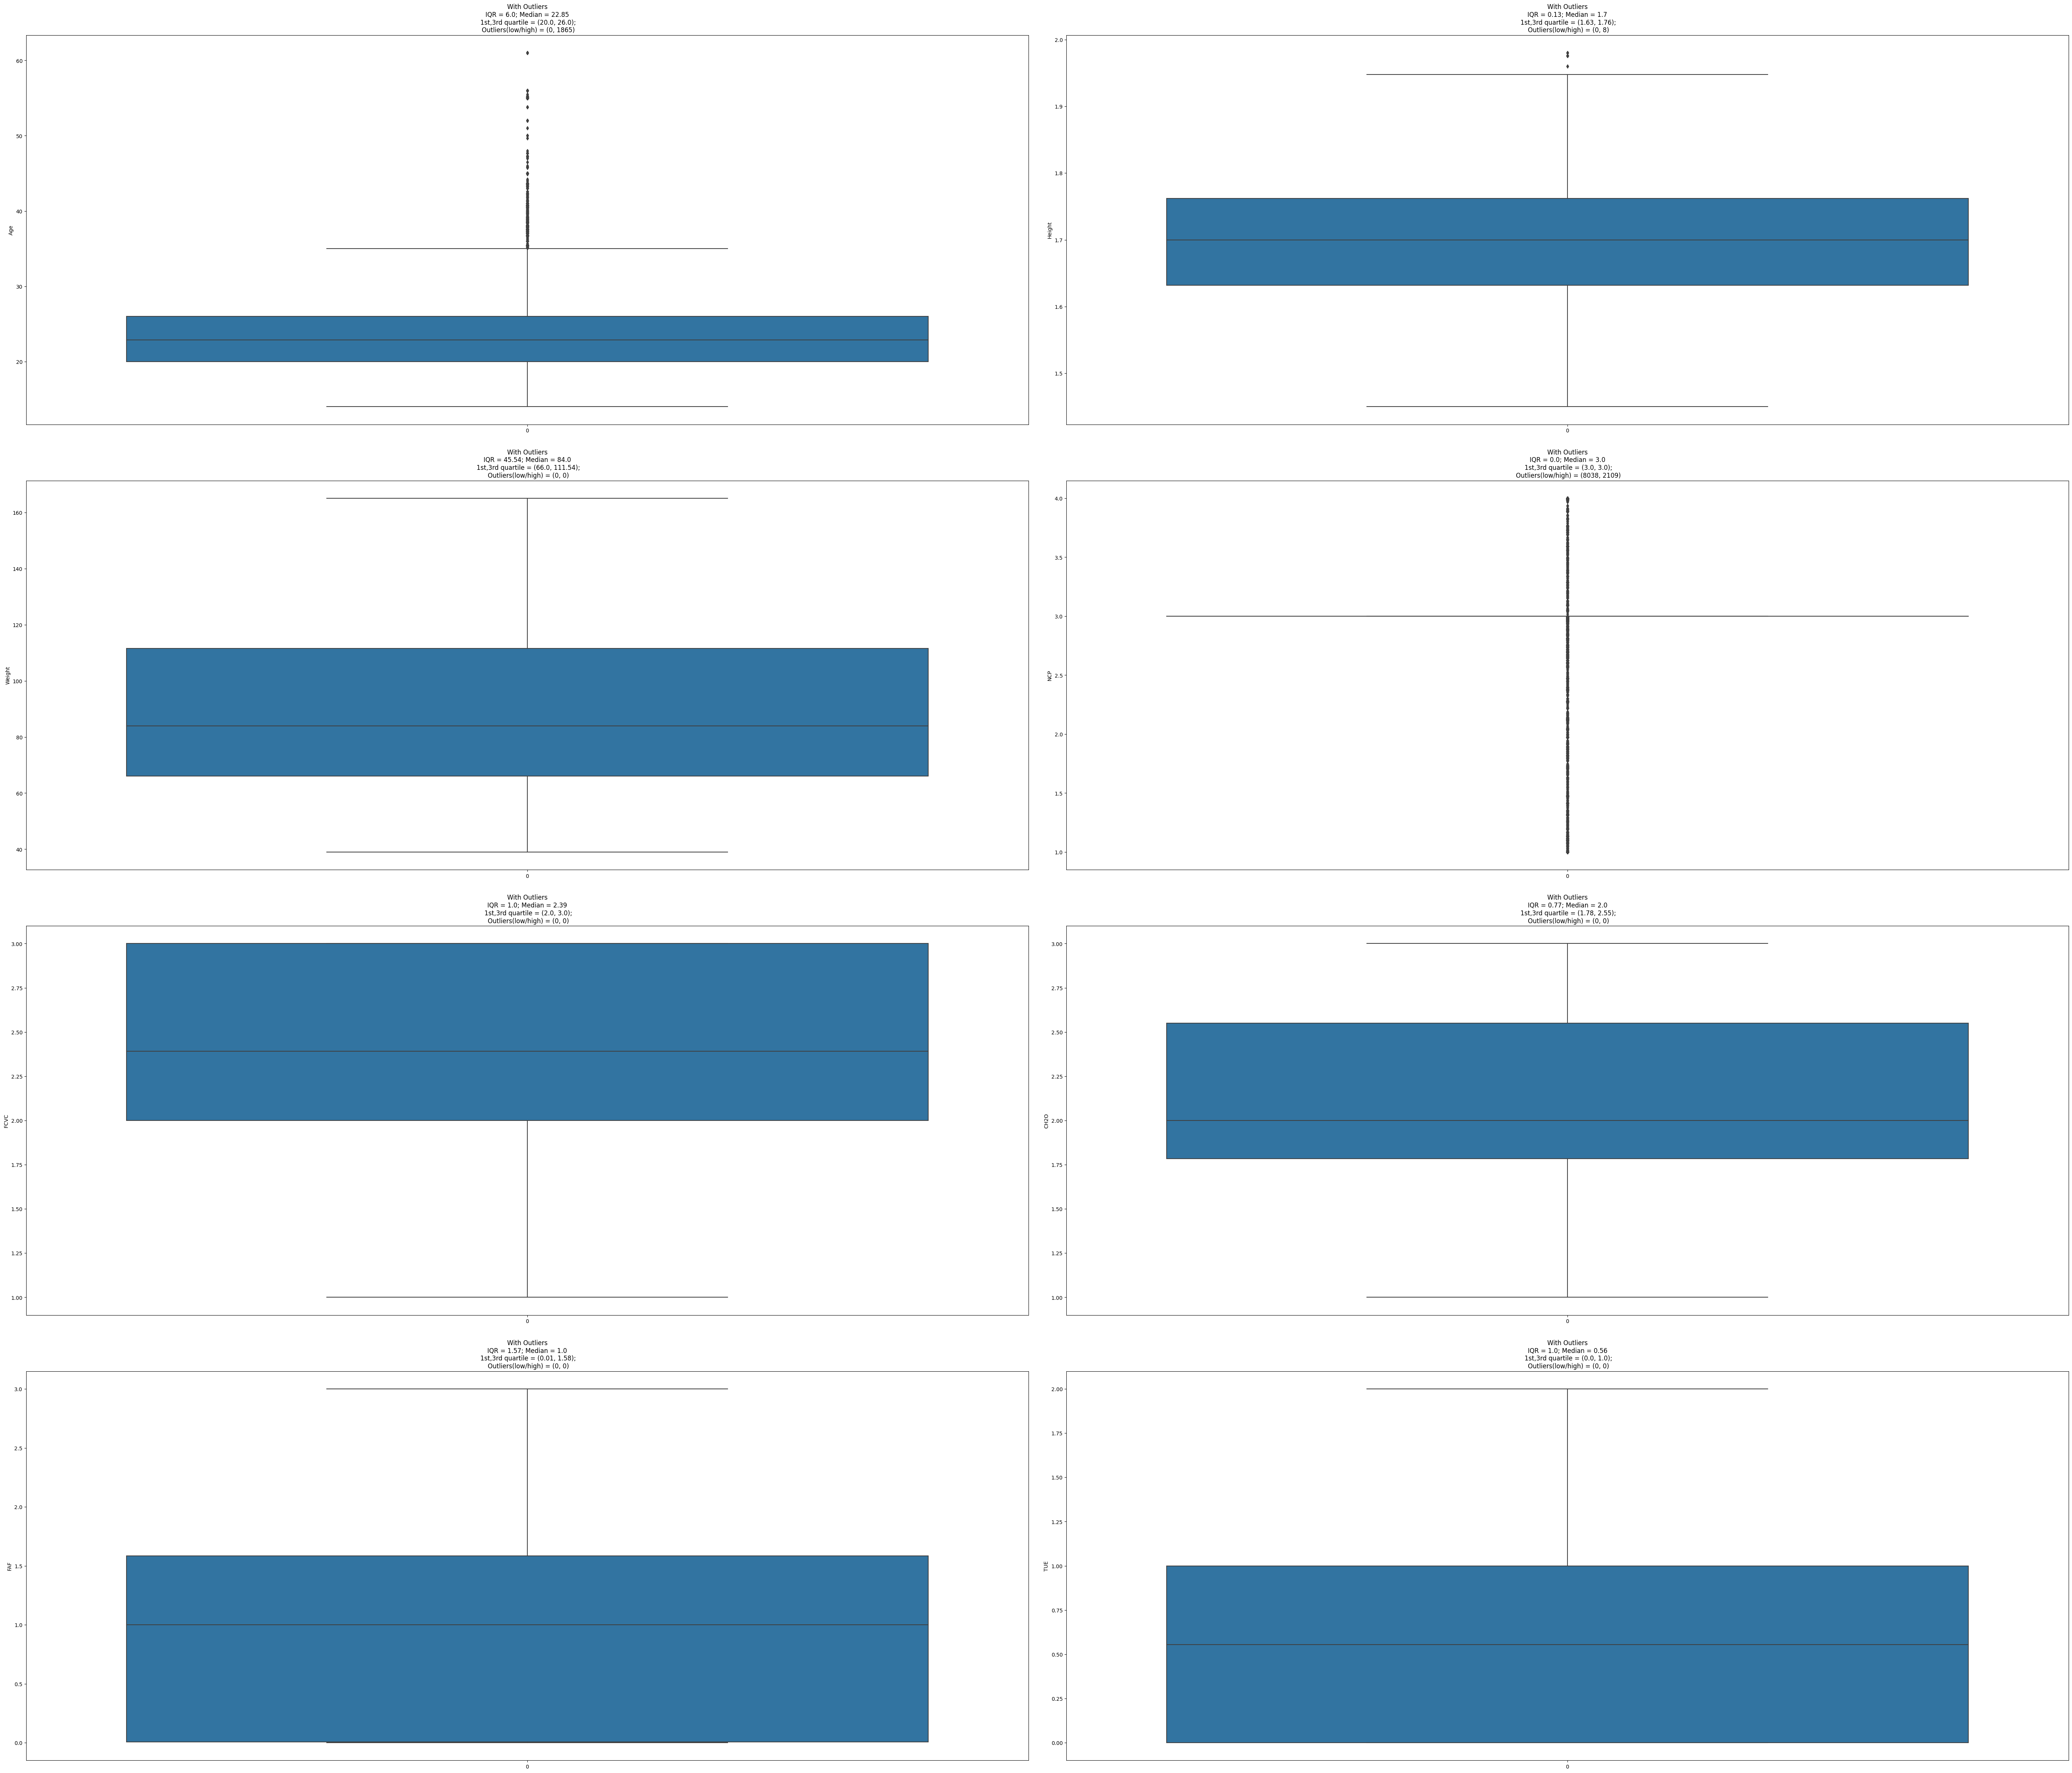

In [24]:
UVA_outlier(data,num_vars,include_outliers=True)

> #### Summary of outliers detection 

* We have 1860 outliers on Age feature that are between 35 and up. 
* For NCP , all data should be concentrate on 3 but we are facing a impressive number of outliers. Need to investigate what is happening depending on this variable and target variable shortly.

In [25]:
quant25 = round(data['Age'].quantile(q = 0.25), 2)
quant75 = round(data['Age'].quantile(q= 0.75), 2)
IQR = round(quant75 - quant25, 2)
med = round(data['Age'].median(), 2)
whis_low = quant25-(1.5*IQR)
whis_high = quant75+(1.5*IQR)

In [26]:
data[data['Age']>whis_high]

id  Gender        Age    Height     Weight  \
25        25    Male  41.318302  1.853223  96.078462   
48        48  Female  37.000000  1.500000  80.000000   
56        56    Male  55.272573  1.700000  80.000000   
80        80  Female  38.098745  1.560215  80.000000   
83        83    Male  38.000000  1.750000  75.000000   
...      ...     ...        ...       ...        ...   
34477  34477  Female  38.000000  1.550000  62.000000   
34479  34479  Female  39.365005  1.556611  80.000000   
34483  34483  Female  40.654155  1.580968  79.760922   
34541  34541  Female  39.585811  1.650000  88.138777   
34584  34584  Female  37.955371  1.673352  80.993213   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
25                               yes  yes  2.000000  3.000000   Sometimes   
48                               yes  yes  2.000000  3.000000   Sometimes   
56                               yes  yes  3.000000  3.000000   Sometimes   
80                               yes  yes  2.020785  1.169173   Sometimes   
83                               yes  yes  3.000000  3.000000  Frequently   
...                              ...  ...       ...       ...         ...   
34477                            yes  yes  2.000000  3.000000   Sometimes   
34479                            yes  yes  2.136830  2.796566   Sometimes   
34483                            yes  yes  2.000000  3.000000   Sometimes   
34541                             no  yes  2.000000  3.000000   Sometimes   
34584                            yes  yes  2.802128  1.139317   Sometimes   

       ... SCC       FAF       TUE        CALC      MTRANS  \
25     ...  no  2.000000  0.000000  Frequently  Automobile   
48     ...  no  0.000000  0.000000   Sometimes  Automobile   
56     ...  no  0.979701  1.544357          no  Automobile   
80     ...  no  1.979355  0.000000   Sometimes  Automobile   
83     ...  no  2.000000  0.000000   Sometimes  Automobile   
...    ...  ..       ...       ...         ...         ...   
34477  ...  no  1.000000  0.000000   Sometimes  Automobile   
34479  ...  no  2.000000  0.000000   Sometimes  Automobile   
34483  ...  no  0.000000  0.000000   Sometimes  Automobile   
34541  ...  no  1.000000  0.000000          no  Automobile   
34584  ...  no  0.503279  0.000000          no  Automobile   

                NObeyesdad Age_round Height_round  Weight_round  patient_class  
25          Obesity_Type_I        41         1.85          96.1          Adult  
48          Obesity_Type_I        37         1.50          80.0          Adult  
56     Overweight_Level_II        55         1.70          80.0          Adult  
80          Obesity_Type_I        38         1.56          80.0          Adult  
83      Overweight_Level_I        38         1.75          75.0          Adult  
...                    ...       ...          ...           ...            ...  
34477                  NaN        38         1.55          62.0          Adult  
34479                  NaN        39         1.56          80.0          Adult  
34483                  NaN        40         1.58          79.8          Adult  
34541                  NaN        39         1.65          88.1          Adult  
34584                  NaN        37         1.67          81.0          Adult  

[1865 rows x 22 columns]

In [27]:
data[data['Age']>whis_high]['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         492
Overweight_Level_II    219
Obesity_Type_II        184
Overweight_Level_I     152
Normal_Weight           20
Insufficient_Weight      7
Obesity_Type_III         0
Name: count, dtype: int64

There is a high number of labeled patients inside age outliers. I will keep outliers on Age feature for the modeling. Same about NCP feature. The others variables seems look good.But a last check on Height to skip outliers checking.

In [28]:
quant25 = round(data['Height'].quantile(q = 0.25), 2)
quant75 = round(data['Height'].quantile(q= 0.75), 2)
IQR = round(quant75 - quant25, 2)
med = round(data['Height'].median(), 2)
whis_low = quant25-(1.5*IQR)
whis_high = quant75+(1.5*IQR)
data[(data['Height']>whis_high) | (data['Height']<whis_low) ]['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_II        2
Insufficient_Weight    1
Obesity_Type_I         1
Normal_Weight          0
Obesity_Type_III       0
Overweight_Level_I     0
Overweight_Level_II    0
Name: count, dtype: int64

All outliers are labeled so let's keep them for our modeling. 

## Bivariate analysis : Numerical-Numerical

### Correlation Matrix

In [29]:
numerical = data[num_vars]
correlation = numerical.corr()
correlation

Age    Height    Weight       NCP      FCVC      CH2O       FAF  \
Age     1.000000 -0.018232  0.279390 -0.052216  0.030012 -0.015739 -0.188189   
Height -0.018232  1.000000  0.415200  0.191326 -0.075664  0.180589  0.291752   
Weight  0.279390  0.415200  1.000000  0.092871  0.242327  0.312566 -0.086757   
NCP    -0.052216  0.191326  0.092871  1.000000  0.105991  0.085547  0.098311   
FCVC    0.030012 -0.075664  0.242327  0.105991  1.000000  0.098292 -0.094572   
CH2O   -0.015739  0.180589  0.312566  0.085547  0.098292  1.000000  0.076767   
FAF    -0.188189  0.291752 -0.086757  0.098311 -0.094572  0.076767  1.000000   
TUE    -0.302729  0.071445 -0.097130  0.065152 -0.144921 -0.008198  0.030597   

             TUE  
Age    -0.302729  
Height  0.071445  
Weight -0.097130  
NCP     0.065152  
FCVC   -0.144921  
CH2O   -0.008198  
FAF     0.030597  
TUE     1.000000

### Heatmap

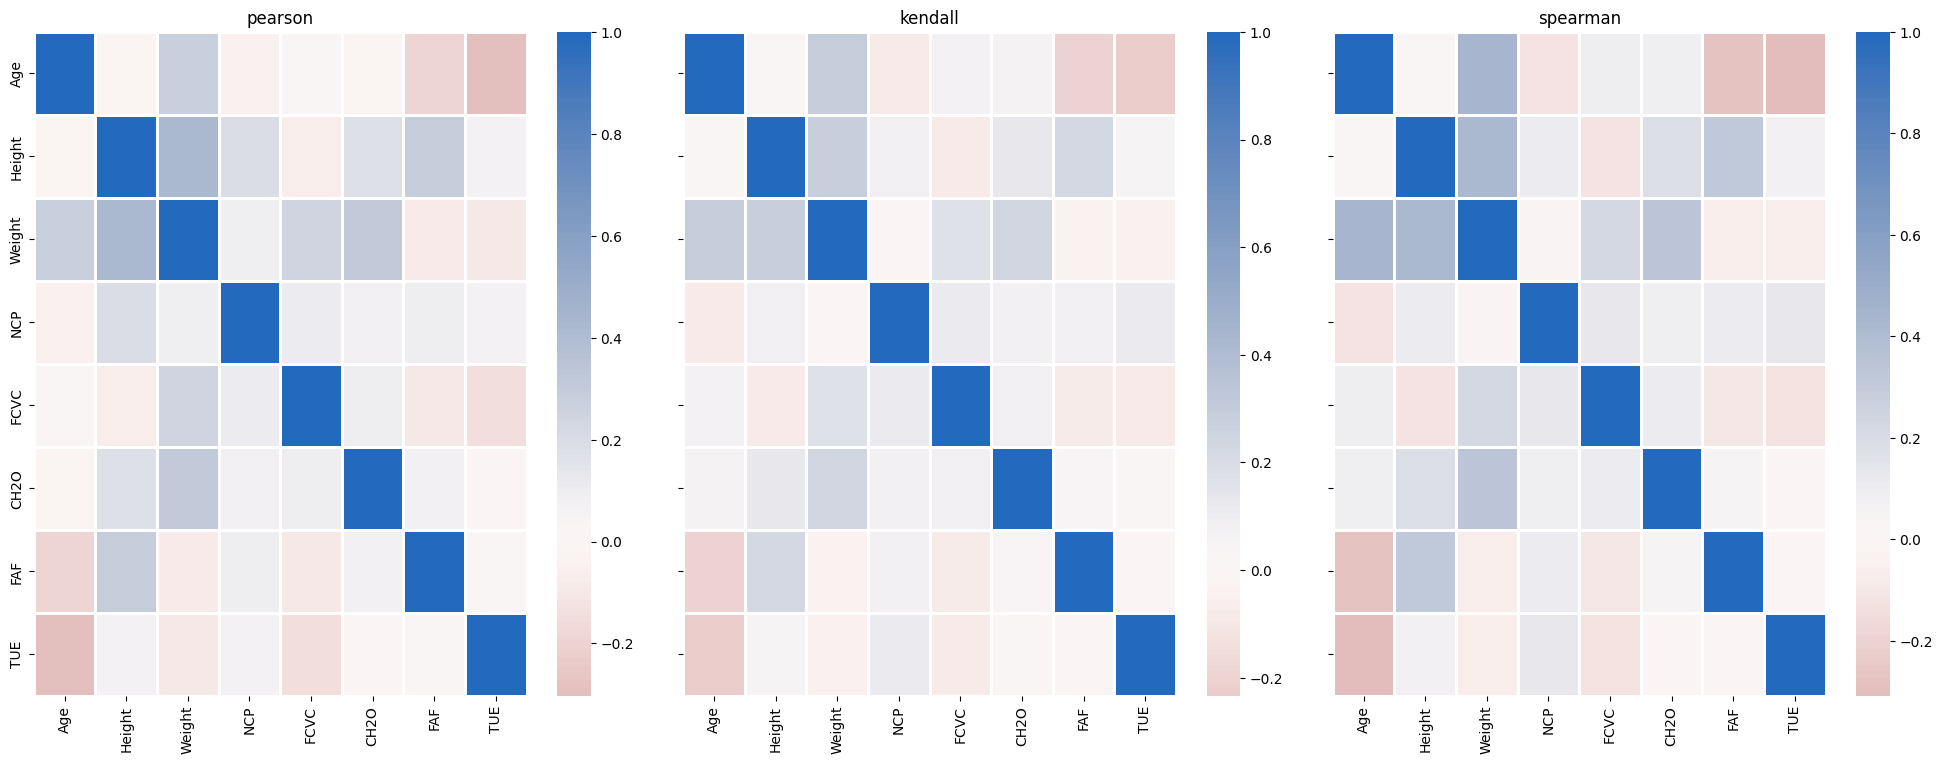

In [30]:
# plotting heatmap using all methods for all numerical variables
correlations = ['pearson','kendall','spearman']
fig, axes = plt.subplots(1, 3, figsize=(20,8), sharey='all')
for i, ax in enumerate(axes.ravel()):
    sb.heatmap(numerical.corr(method=correlations[i]), linewidths=2, cmap='vlag_r', center=0, ax=ax)
    axes[i].set_title(correlations[i])
plt.tight_layout(pad =2)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation. Except Age and Height which are moderately correlated. 

### Scatterplot

<Figure size 640x480 with 0 Axes>

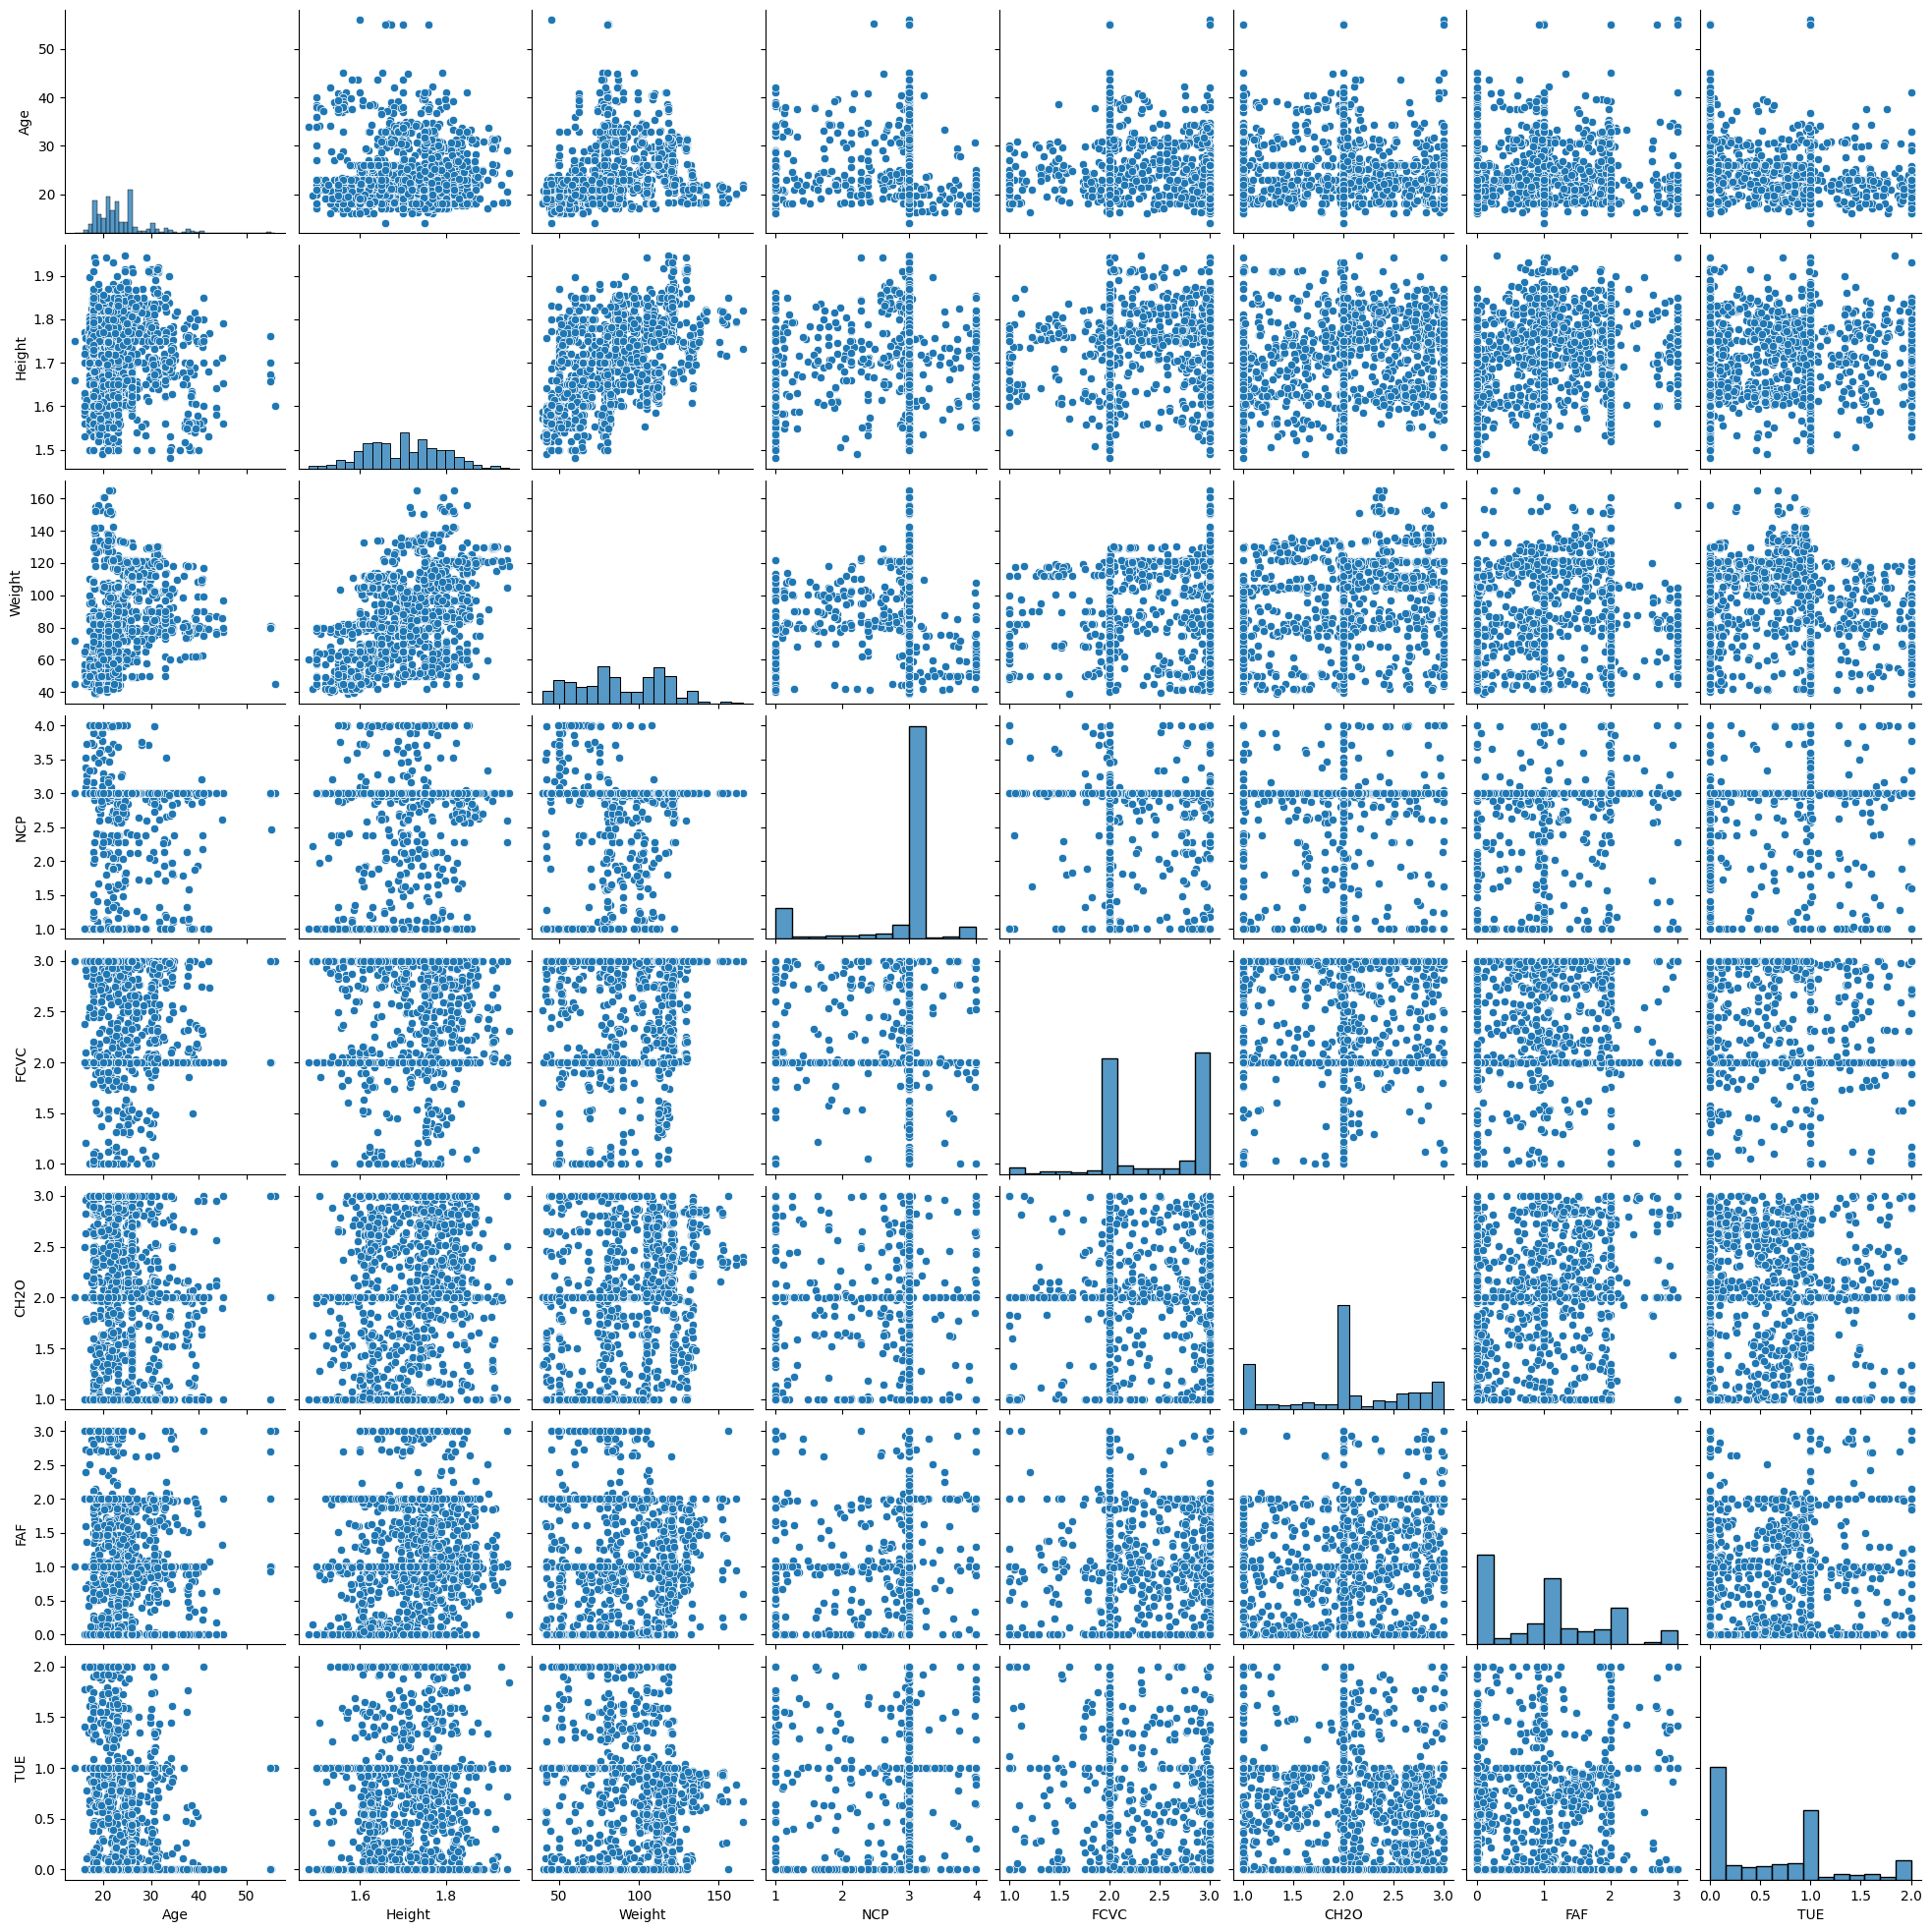

In [31]:
# scatter plot for a sample of trips
plt.figure()
sb.pairplot(numerical.sample(2000))

The scatter plot is not meaningful due to very low correlation and presence of outliers.

## Bivariate : Categorical-Categorical

Let's add new categorical variable based on height ranges. I will apply these ranges by refering to information on https://ourworldindata.org/human-height. 
For categorical-categorical , I will focus on target (NObeysdad).

In [32]:
data['height_class'] = 'to_fill'
data['height_class'][((data['Height'] <= 1.632) & (data['Gender'] == 'Male')) | ((data['Height'] <= 1.506) & (data['Gender'] == 'Female'))  ] = 'Very_small'
data['height_class'][((data['Height'] > 1.632) & (data['Height'] <= 1.708) & (data['Gender'] == 'Male')) | ((data['Height'] > 1.506) & (data['Height'] <= 1.576) & (data['Gender'] == 'Female'))  ] = 'Small'
data['height_class'][((data['Height'] > 1.708) & (data['Height'] <= 1.860) & (data['Gender'] == 'Male')) | ((data['Height'] > 1.576) & (data['Height'] <= 1.718) & (data['Gender'] == 'Female'))  ] = 'Medium'
data['height_class'][((data['Height'] > 1.860) & (data['Height'] <= 1.936) & (data['Gender'] == 'Male')) | ((data['Height'] > 1.718) & (data['Height'] <= 1.789) & (data['Gender'] == 'Female'))  ] = 'Tall'
data['height_class'][((data['Height'] > 1.936) & (data['Gender'] == 'Male')) | ((data['Height'] > 1.789) & (data['Gender'] == 'Female'))  ] = 'Very_tall'

data['height_class'] = data['height_class'].astype('category')

In [33]:
data['height_class'].value_counts()

height_class
Medium        23115
Small          6387
Tall           3561
Very_small     1135
Very_tall       400
Name: count, dtype: int64

In [34]:
data.select_dtypes(exclude = ['int64','float64','Int64']).dtypes

Gender                            category
family_history_with_overweight    category
FAVC                              category
CAEC                              category
SMOKE                             category
SCC                               category
CALC                              category
MTRANS                            category
NObeyesdad                        category
patient_class                     category
height_class                      category
dtype: object

In [35]:
cat_to_cross = ['NObeyesdad','Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','patient_class','height_class']
d = data[cat_to_cross]
t = pd.crosstab(d['NObeyesdad'],d['patient_class'])
t

patient_class        Adult  Chlid  Teenager
NObeyesdad                                 
Insufficient_Weight     24      0      2499
Normal_Weight          290      4      2788
Obesity_Type_I         804      1      2105
Obesity_Type_II       2277      0       971
Obesity_Type_III      2567      0      1479
Overweight_Level_I     516      0      1911
Overweight_Level_II   1016      0      1506

In [36]:
from scipy.stats import chi2_contingency
chi2_contingency(t)
pd.crosstab(d['NObeyesdad'],d['patient_class'],normalize='index')

patient_class           Adult     Chlid  Teenager
NObeyesdad                                       
Insufficient_Weight  0.009512  0.000000  0.990488
Normal_Weight        0.094095  0.001298  0.904607
Obesity_Type_I       0.276289  0.000344  0.723368
Obesity_Type_II      0.701047  0.000000  0.298953
Obesity_Type_III     0.634454  0.000000  0.365546
Overweight_Level_I   0.212608  0.000000  0.787392
Overweight_Level_II  0.402855  0.000000  0.597145

In [37]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sb.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

**What categories of people are more subjected to have critical Obesity level?**

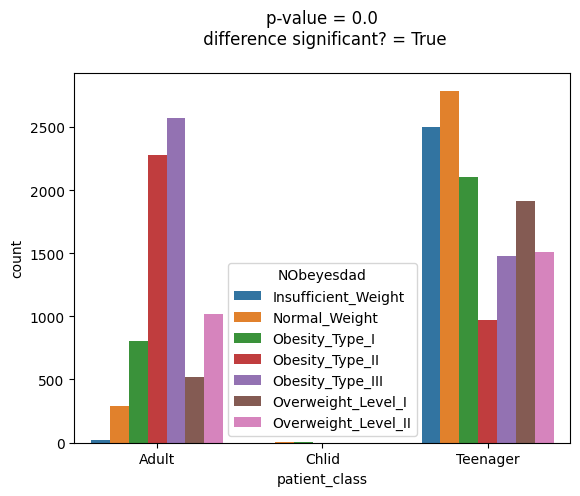

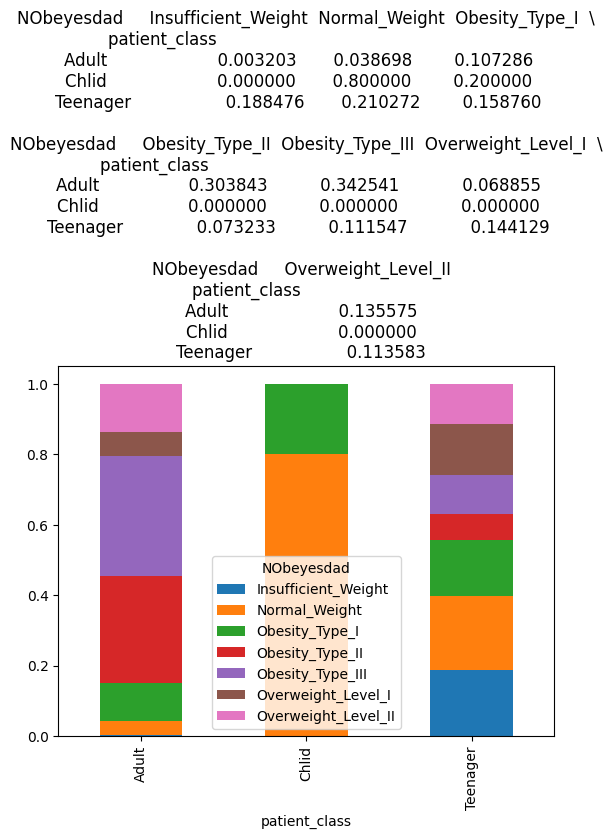

In [38]:
BVA_categorical_plot(data,'NObeyesdad', 'patient_class')

* Children have most normal weight and Obesity_type_I.
* The differences are very significant between classes. Most of adults here have big problems regarding their weights and obesity (30% up to 34%) have Obesity_Type_II and III.
* On Teenagers side, by focusing on obesity cases , 11 up to 15 percent of them have Obesity_levels_I up to Overweight_Level_II.

**Does the obesity level depend of the height?** 

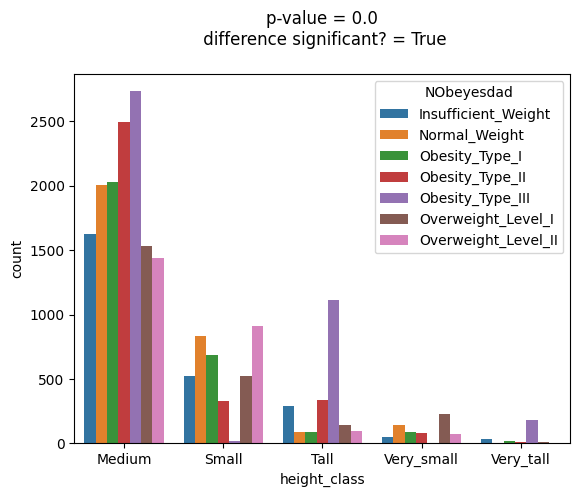

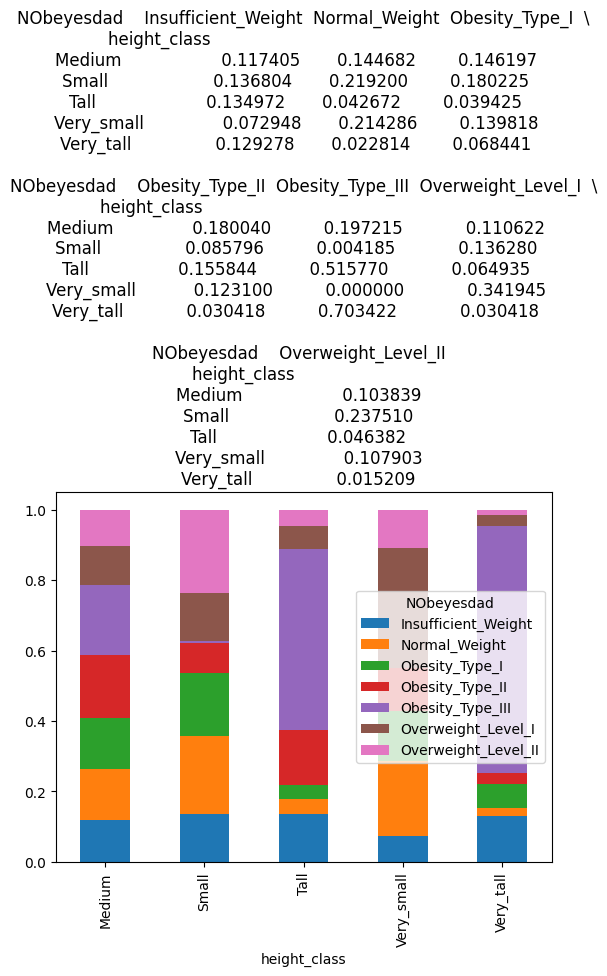

In [39]:
BVA_categorical_plot(data,'NObeyesdad', 'height_class')

We can observe that taller the patient is more he is succeptible to develop the Obesity_level_III. On the other board very small patient are 34.19% overweighted at level I. The highest level of Obesity here is present on 70.34% of very tall heighted people.

**Are smokers more subjected of obesity cases?**

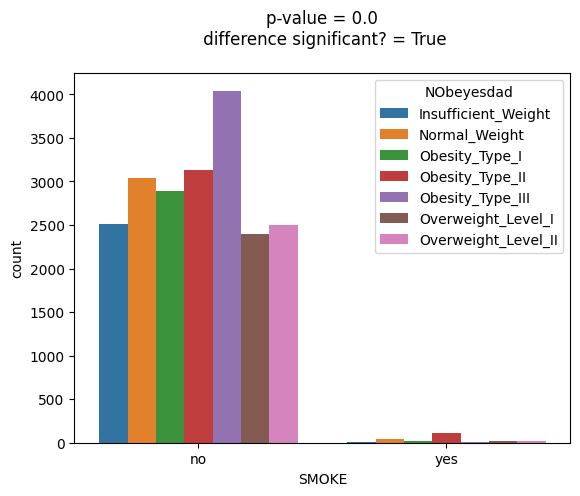

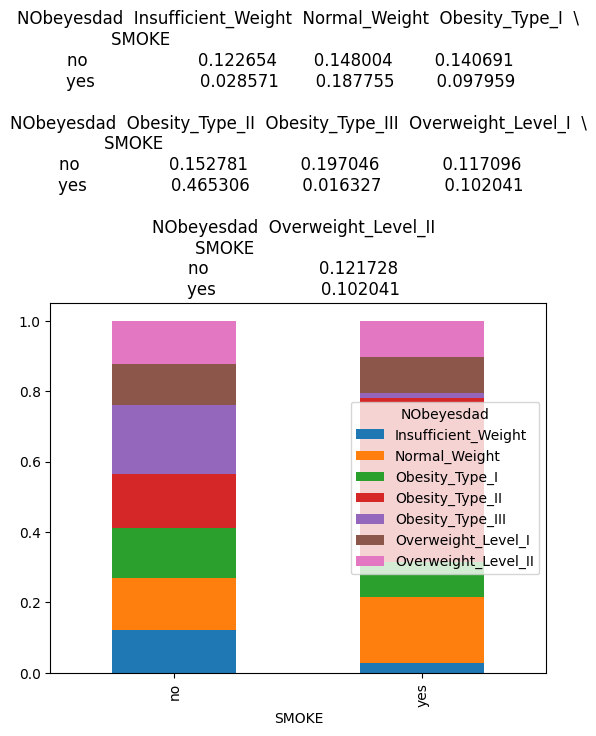

In [40]:
BVA_categorical_plot(data,'NObeyesdad', 'SMOKE')

The response seems to be **Yes**. Here 46.53% of smokers have advanced Obesity level (Obesity_Type_II). Surely that impacts the obesity.

**What's the impact of family genetics on Obesity level?** 

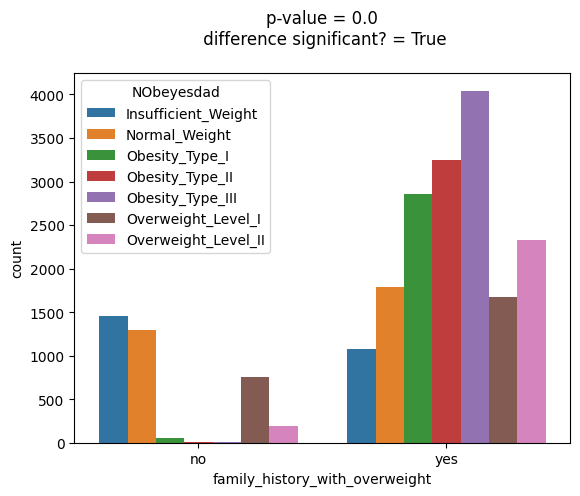

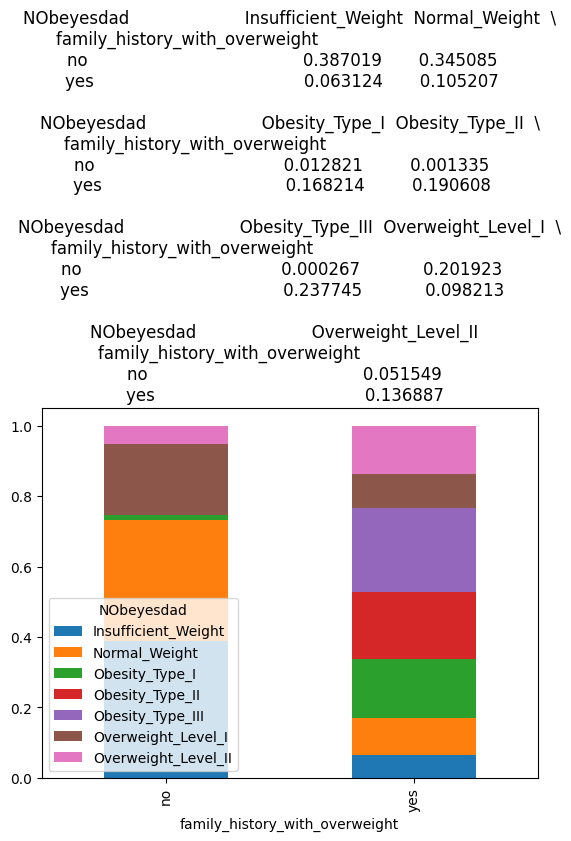

In [41]:
BVA_categorical_plot(data,'NObeyesdad', 'family_history_with_overweight')

Looks like if overweight is present in family, the patient is succeptible to have consequent obesity level.

**Could the transport way give indicate the Obesity level of people?**

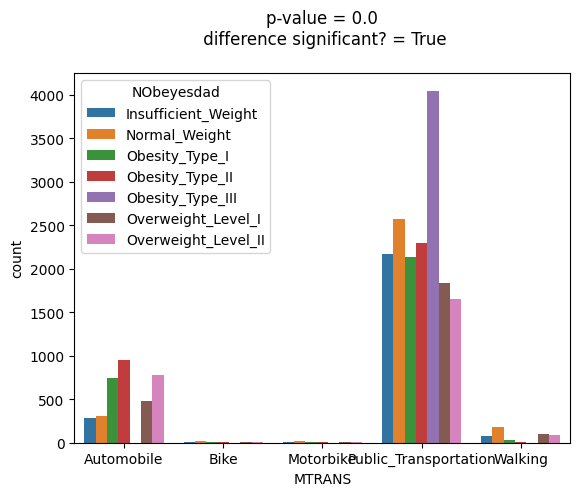

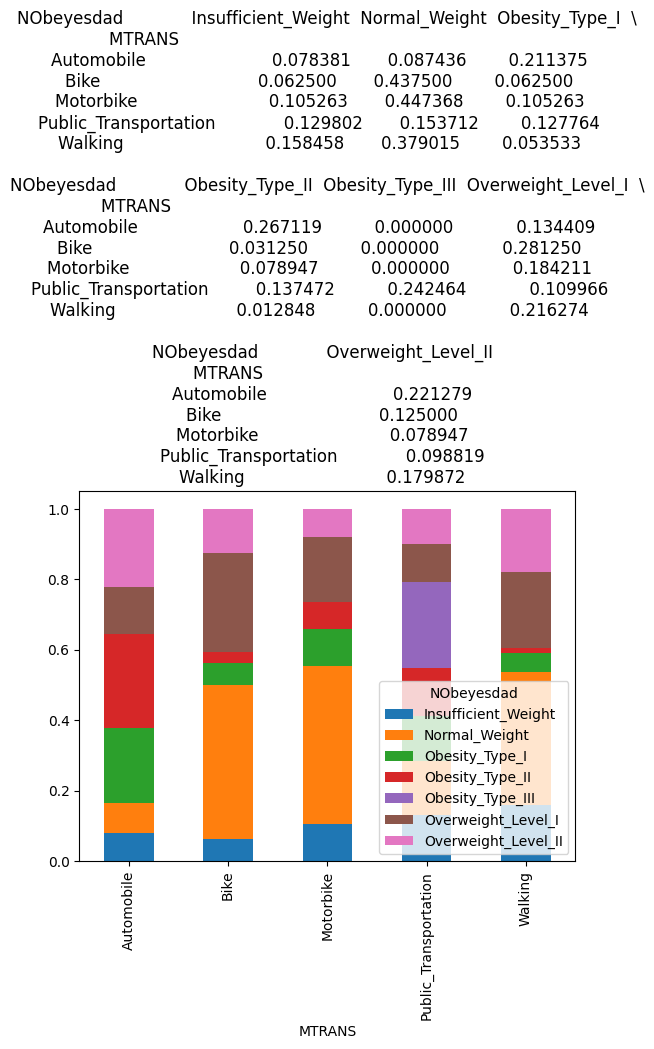

In [42]:
BVA_categorical_plot(data,'NObeyesdad', 'MTRANS')

**Yes**, people using more bike, motorbikes and walking seems have normal weights. Most of Obesity_level_III people use public transportations.

### Bivariate : Categorical-Numerical

Let's have better view of age and height impact on obesity level depending of genetics in family, smoker/not people.

In [43]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    '''
      Takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval

In [44]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))

In [45]:
def Bivariate_cont_cat(data, cont, cat, category,mul_cat=False):
    from itertools import combinations
    #creating 2 samples
    if mul_cat==False:
        x1 = data[cont][data[cat]==category][:]
        x2 = data[cont][~(data[cat]==category)][:]
        n1, n2 = x1.shape[0], x2.shape[0]
        m1, m2 = x1.mean(), x2.mean()
        std1, std2 = x1.std(), x2.std()
        print('Frist group mean :{}\t'.format(m1),'Second group mean :{}\t'.format(m2))
        #calculating p-values
        t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
        z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
         #table
        table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
        #plotting
        plt.figure(figsize = (15,6), dpi=140)
  
        sb.barplot(y =['First_ Group {}'.format(category)+' of {}'.format(cat),'Second_ Group'], x = [m1,m2])
        plt.ylabel('mean {}'.format(cont))
        plt.xlabel(cat)
        plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

    else:
        var_cat = list(combinations(data[cat].value_counts().reset_index().iloc[:].index,2))
        for j, i in enumerate(var_cat):
            x1 = data[cont][data[cat] == i[0]][:]
            x2 = data[cont][data[cat] == i[1]][:]
            n1, n2 = x1.shape[0], x2.shape[0]
            m1, m2 = x1.mean(), x2.mean()
            std1, std2 = x1.std(), x2.std()
            print('Group {}\n First group mean : {}'.format(i,m1),'Second group mean :{}\t'.format(m2))
            #calculating p-values
            try:
                t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
                z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
                print('\nt-test p-value = {} \n z-test p-value = {}\n'.format(t_p_val,z_p_val))
            except:
                pass
        #table
        table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
        #plotting
        plt.figure(figsize = (15,6), dpi=140)
        print(table)
                  
        # boxplot
        plt.subplot(1,2,1)
        sb.boxplot(x=cat, y=cont, data=data)
        plt.xticks(rotation = 45 )
    
        #Full Overview
        plt.subplot(1,2,2)
        sb.barplot(x=cat, y=cont, data=data)
        plt.tight_layout(pad = 3)
        plt.title('categorical boxplot')
        plt.xticks(rotation = 45 )

Group (0, 1)
 First group mean : nan Second group mean :nan	
Group (0, 2)
 First group mean : nan Second group mean :nan	
Group (0, 3)
 First group mean : nan Second group mean :nan	
Group (0, 4)
 First group mean : nan Second group mean :nan	
Group (0, 5)
 First group mean : nan Second group mean :nan	
Group (0, 6)
 First group mean : nan Second group mean :nan	
Group (1, 2)
 First group mean : nan Second group mean :nan	
Group (1, 3)
 First group mean : nan Second group mean :nan	
Group (1, 4)
 First group mean : nan Second group mean :nan	
Group (1, 5)
 First group mean : nan Second group mean :nan	
Group (1, 6)
 First group mean : nan Second group mean :nan	
Group (2, 3)
 First group mean : nan Second group mean :nan	
Group (2, 4)
 First group mean : nan Second group mean :nan	
Group (2, 5)
 First group mean : nan Second group mean :nan	
Group (2, 6)
 First group mean : nan Second group mean :nan	
Group (3, 4)
 First group mean : nan Second group mean :nan	
Group (3, 5)
 First grou

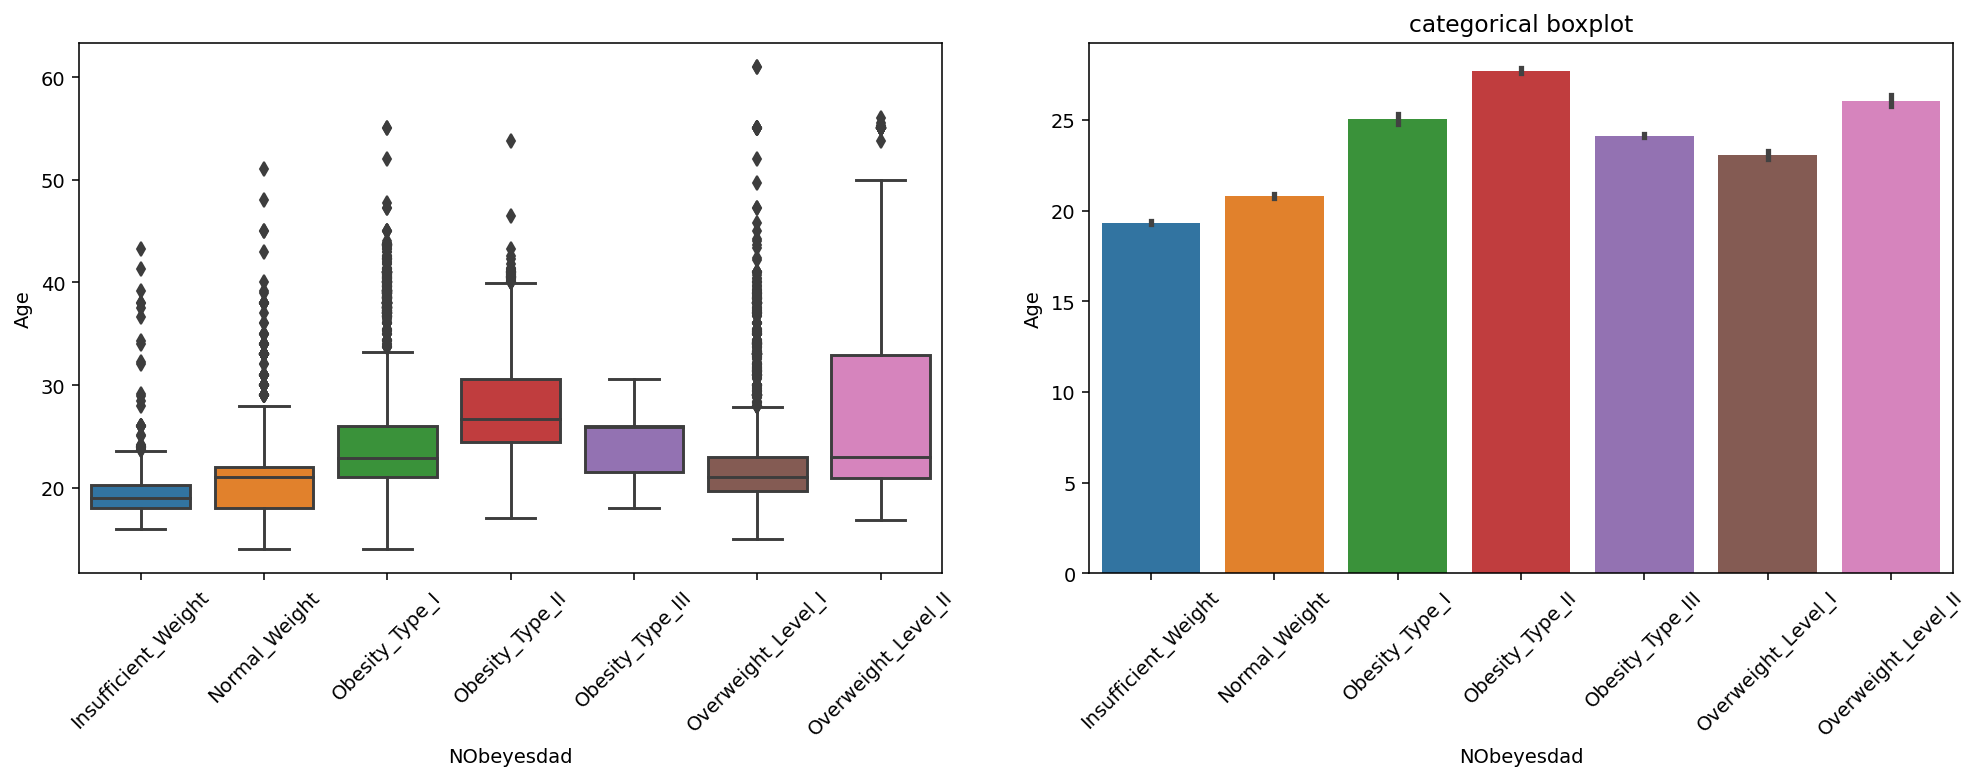

In [46]:
Bivariate_cont_cat(data,'Age','NObeyesdad','',mul_cat=True)

We have better view about how are spreaded the outliers on Age side. I will limit the maximum of age per case of Obesity level.

In [47]:
Obesity_levels = data.NObeyesdad.value_counts().index.to_list()
Obesity_levels

['Obesity_Type_III',
 'Obesity_Type_II',
 'Normal_Weight',
 'Obesity_Type_I',
 'Insufficient_Weight',
 'Overweight_Level_II',
 'Overweight_Level_I']

In [48]:
data['Age_on_obesity'] = data['Age']
for i in Obesity_levels:
    quant25 = round(data[data.NObeyesdad == i]['Age_on_obesity'].quantile(0.25), 2)
    quant75 = round(data[data.NObeyesdad == i]['Age_on_obesity'].quantile(0.75), 2)
    IQR = round(quant75 - quant25, 2)
    print('IQR on {}: {}'.format(i,IQR))
    whis_high = quant75+(1.5*IQR)
    whis_low = quant25-(1.5*IQR)
    
    data['Age_on_obesity'][(data.NObeyesdad == i)& (data['Age_on_obesity']>whis_high)] = whis_high
    data['Age_on_obesity'][(data.NObeyesdad == i)&(data['Age_on_obesity']<whis_low)] = whis_low

IQR on Obesity_Type_III: 4.43
IQR on Obesity_Type_II: 6.19
IQR on Normal_Weight: 4.0
IQR on Obesity_Type_I: 5.0
IQR on Insufficient_Weight: 2.26
IQR on Overweight_Level_II: 11.99
IQR on Overweight_Level_I: 3.28


Group (0, 1)
 First group mean : nan Second group mean :nan	
Group (0, 2)
 First group mean : nan Second group mean :nan	
Group (0, 3)
 First group mean : nan Second group mean :nan	
Group (0, 4)
 First group mean : nan Second group mean :nan	
Group (0, 5)
 First group mean : nan Second group mean :nan	
Group (0, 6)
 First group mean : nan Second group mean :nan	
Group (1, 2)
 First group mean : nan Second group mean :nan	
Group (1, 3)
 First group mean : nan Second group mean :nan	
Group (1, 4)
 First group mean : nan Second group mean :nan	
Group (1, 5)
 First group mean : nan Second group mean :nan	
Group (1, 6)
 First group mean : nan Second group mean :nan	
Group (2, 3)
 First group mean : nan Second group mean :nan	
Group (2, 4)
 First group mean : nan Second group mean :nan	
Group (2, 5)
 First group mean : nan Second group mean :nan	
Group (2, 6)
 First group mean : nan Second group mean :nan	
Group (3, 4)
 First group mean : nan Second group mean :nan	
Group (3, 5)
 First grou

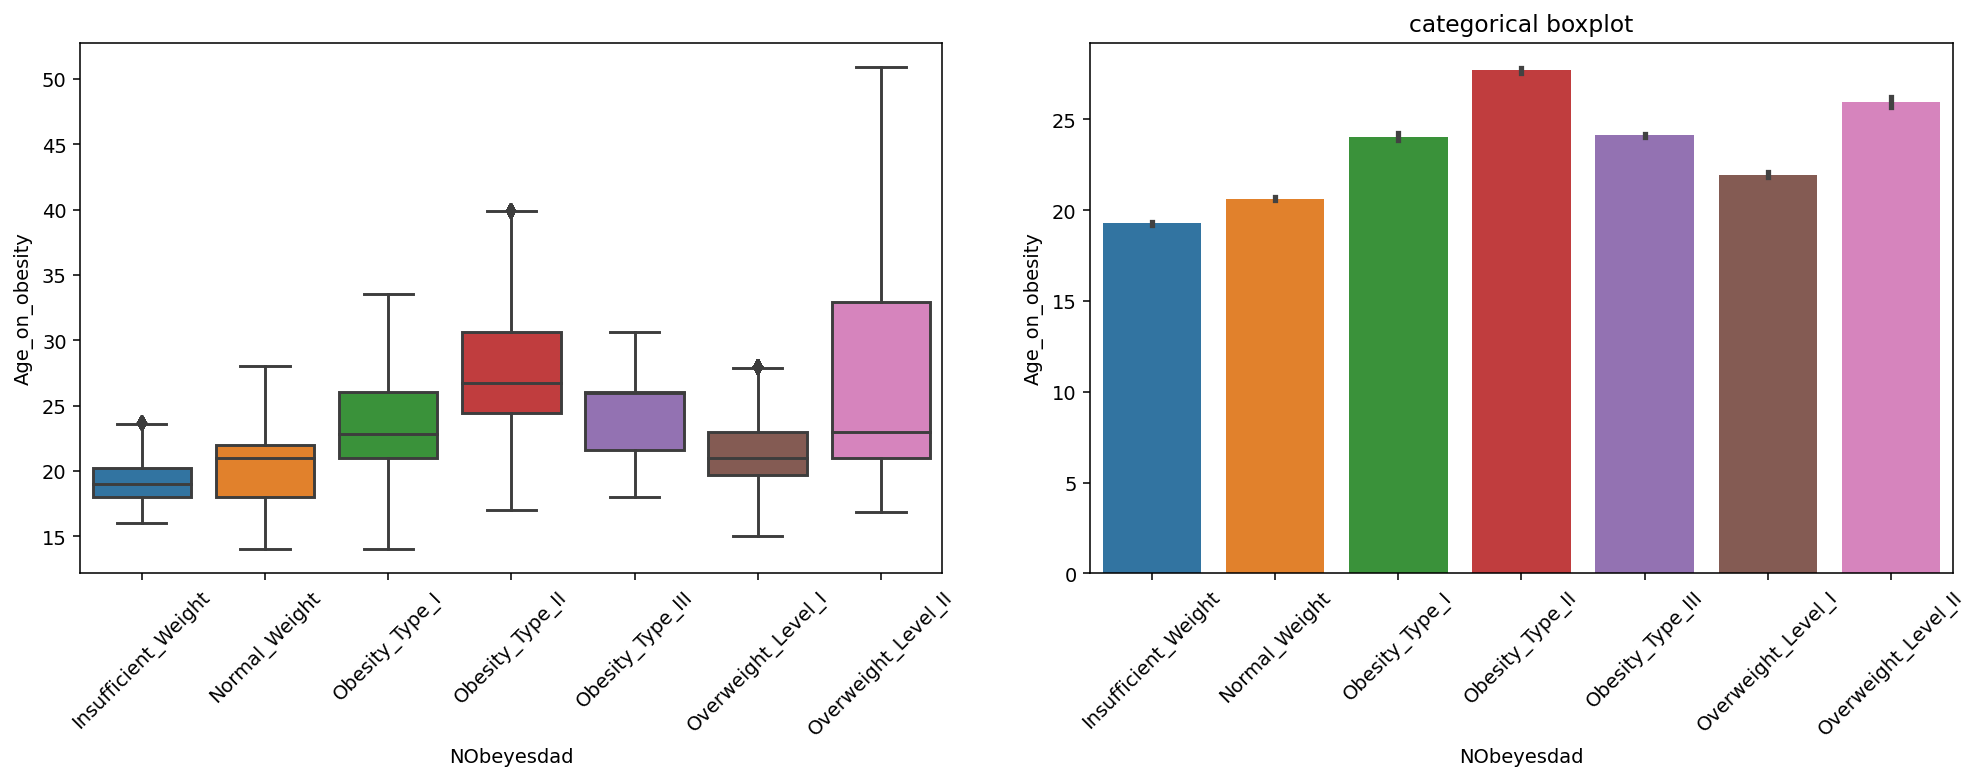

In [49]:
Bivariate_cont_cat(data,'Age_on_obesity','NObeyesdad','',mul_cat=True)

So these new Age values will be used for my modeling.

Group (0, 1)
 First group mean : nan Second group mean :nan	
Group (0, 2)
 First group mean : nan Second group mean :nan	
Group (0, 3)
 First group mean : nan Second group mean :nan	
Group (0, 4)
 First group mean : nan Second group mean :nan	
Group (0, 5)
 First group mean : nan Second group mean :nan	
Group (0, 6)
 First group mean : nan Second group mean :nan	
Group (1, 2)
 First group mean : nan Second group mean :nan	
Group (1, 3)
 First group mean : nan Second group mean :nan	
Group (1, 4)
 First group mean : nan Second group mean :nan	
Group (1, 5)
 First group mean : nan Second group mean :nan	
Group (1, 6)
 First group mean : nan Second group mean :nan	
Group (2, 3)
 First group mean : nan Second group mean :nan	
Group (2, 4)
 First group mean : nan Second group mean :nan	
Group (2, 5)
 First group mean : nan Second group mean :nan	
Group (2, 6)
 First group mean : nan Second group mean :nan	
Group (3, 4)
 First group mean : nan Second group mean :nan	
Group (3, 5)
 First grou

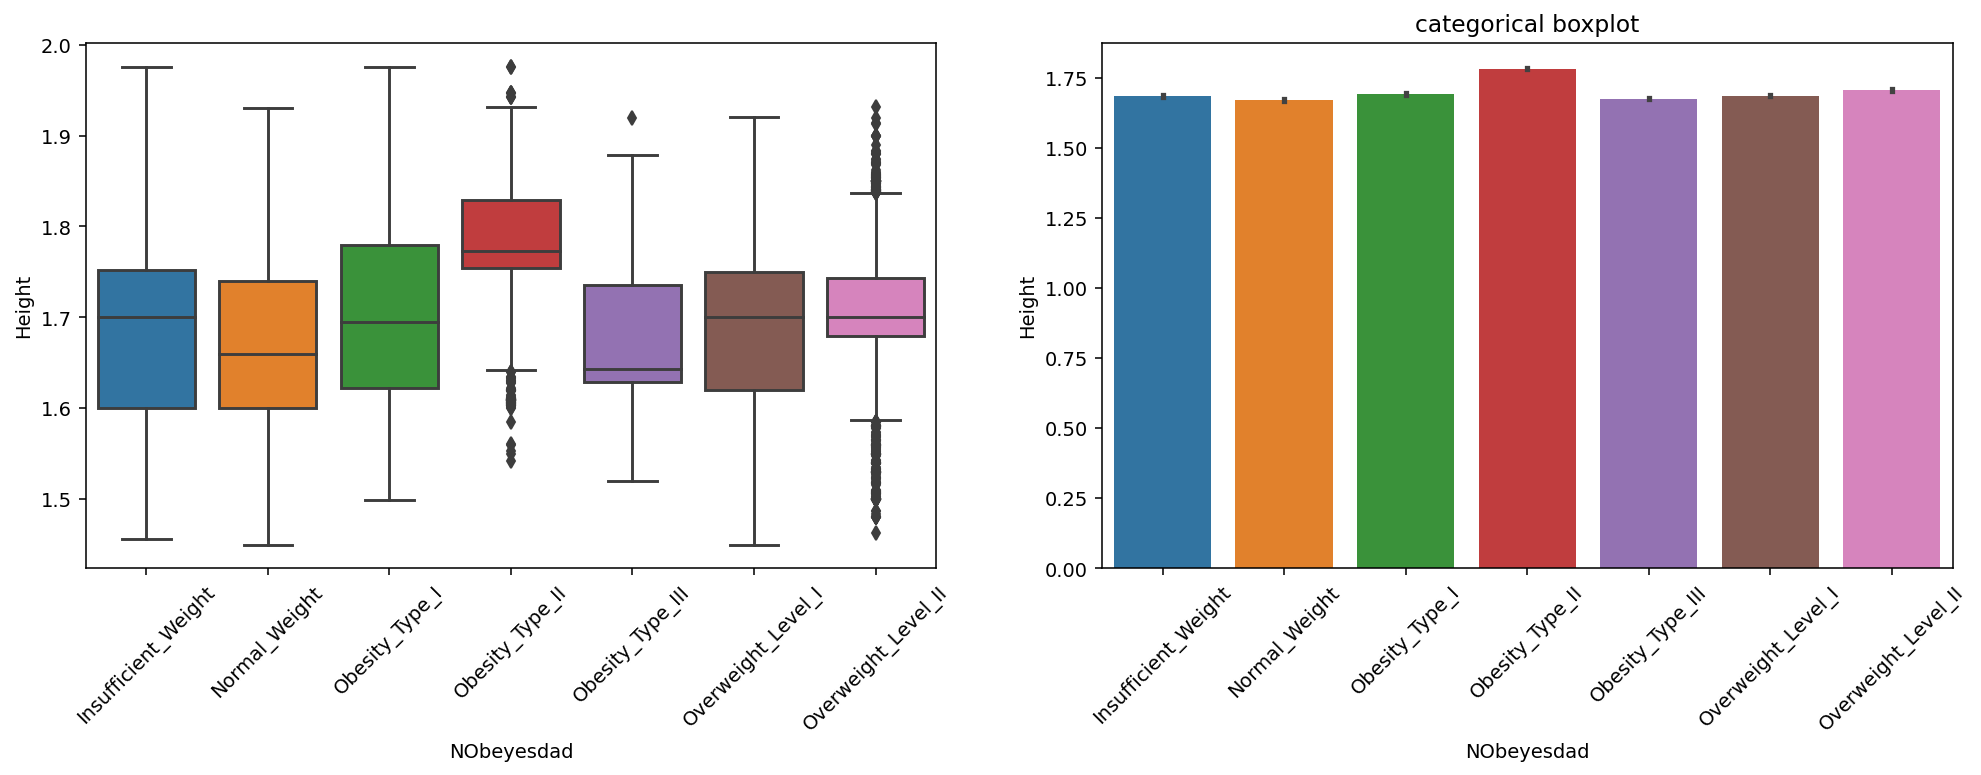

In [50]:
Bivariate_cont_cat(data,'Height','NObeyesdad','',mul_cat=True)

> #### Full summary of EDA
* The data is quite balanced on male and female patient number.
* Most of patients have overweighted people in their family history (more than 80% of patients in dataset).
* Most of patients in data don't smoke.
* Most of patients use public transportation and automobile to moove.
* Most of patients here have a tag of Obesity_type_III and Obesity_type_II. 
* Most of patients are teenagers followed by adults. Very few children in data.(not significant number)
* Children have most normal weight and Obesity_type_I.
* The differences are very significant between classes. Most of adults here have big problems regarding their weights and obesity (30% up to 34%) have Obesity_Type_II and III.
* On Teenagers side, by focusing on obesity cases , 11 up to 15 percent of them have Obesity_levels_I up to Overweight_Level_II.
* We observe that taller the patient is more he is succeptible to develop the Obesity_level_III. On the other board very small patient are 34.19% overweighted at level I. The highest level of Obesity here is present on 70.34% of very tall heighted people.
* If overweight is present in family, the patient is succeptible to have consequent obesity level.
* People using more bike, motorbikes and walking seems have normal weights. Most of Obesity_level_III people use public transportations.
* The number of people by obesity level is quite balanced. Just the number of Obesity_type_II is slightly superior to the others. I accept the outliers on height as the perspective to affect weigting of people is very subjective. As that's not my expertise domain, feel free to propose me if you know more on the subject.

In [51]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'Age_round', 'Height_round', 'Weight_round', 'patient_class',
       'height_class', 'Age_on_obesity'],
      dtype='object')

#Let's resample under train and test sets
The columns which will be finally used for modeling are 'Gender', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'patient_class', 'height_class', 'Age_on_obesity'.

In [52]:
data_f = data.drop(columns=['Age','Age_round', 'Height_round',
       'Weight_round'])
train = data_f.loc[:len(df_train)-1]
test = data_f.loc[len(df_train):]
print (data.shape, train.shape,test.shape)

(34598, 24) (20758, 20) (13840, 20)


In [53]:
train.nunique()


id                                20758
Gender                                2
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
patient_class                         3
height_class                          5
Age_on_obesity                     1620
dtype: int64

In [54]:
test.shape, train.shape

((13840, 20), (20758, 20))

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score,classification_report

# Preprocessing

### Dummies with multiple categories

In [56]:
data_f.select_dtypes(exclude = ['int64','float64','Int64']).dtypes

Gender                            category
family_history_with_overweight    category
FAVC                              category
CAEC                              category
SMOKE                             category
SCC                               category
CALC                              category
MTRANS                            category
NObeyesdad                        category
patient_class                     category
height_class                      category
dtype: object

In [57]:
# Convert categorical variables with 2 values to one hot encoded features and those whith more by label encoding
cat_he_vars = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
cat_lab_vars = ['CAEC','CALC','MTRANS','patient_class','height_class']
for el in cat_he_vars:
    data_f = pd.concat([data_f,pd.get_dummies(data_f[el],prefix = str(el),prefix_sep='_',dtype=float)],axis = 1)
data_f.head()

id  Gender    Height      Weight family_history_with_overweight FAVC  \
0   0    Male  1.699998   81.669950                            yes  yes   
1   1  Female  1.560000   57.000000                            yes  yes   
2   2  Female  1.711460   50.165754                            yes  yes   
3   3  Female  1.710730  131.274851                            yes  yes   
4   4    Male  1.914186   93.798055                            yes  yes   

       FCVC       NCP        CAEC SMOKE  ...  Gender_Female Gender_Male  \
0  2.000000  2.983297   Sometimes    no  ...            0.0         1.0   
1  2.000000  3.000000  Frequently    no  ...            1.0         0.0   
2  1.880534  1.411685   Sometimes    no  ...            1.0         0.0   
3  3.000000  3.000000   Sometimes    no  ...            1.0         0.0   
4  2.679664  1.971472   Sometimes    no  ...            0.0         1.0   

   family_history_with_overweight_no  family_history_with_overweight_yes  \
0                                0.0                                 1.0   
1                                0.0                                 1.0   
2                                0.0                                 1.0   
3                                0.0                                 1.0   
4                                0.0                                 1.0   

  FAVC_no FAVC_yes SMOKE_no SMOKE_yes SCC_no  SCC_yes  
0     0.0      1.0      1.0       0.0    1.0      0.0  
1     0.0      1.0      1.0       0.0    1.0      0.0  
2     0.0      1.0      1.0       0.0    1.0      0.0  
3     0.0      1.0      1.0       0.0    1.0      0.0  
4     0.0      1.0      1.0       0.0    1.0      0.0  

[5 rows x 30 columns]

In [58]:
le = LabelEncoder()
for el in cat_lab_vars:
    data_f[el]= le.fit_transform(data_f[el])
data_f.head()

id  Gender    Height      Weight family_history_with_overweight FAVC  \
0   0    Male  1.699998   81.669950                            yes  yes   
1   1  Female  1.560000   57.000000                            yes  yes   
2   2  Female  1.711460   50.165754                            yes  yes   
3   3  Female  1.710730  131.274851                            yes  yes   
4   4    Male  1.914186   93.798055                            yes  yes   

       FCVC       NCP  CAEC SMOKE  ...  Gender_Female Gender_Male  \
0  2.000000  2.983297     2    no  ...            0.0         1.0   
1  2.000000  3.000000     1    no  ...            1.0         0.0   
2  1.880534  1.411685     2    no  ...            1.0         0.0   
3  3.000000  3.000000     2    no  ...            1.0         0.0   
4  2.679664  1.971472     2    no  ...            0.0         1.0   

   family_history_with_overweight_no  family_history_with_overweight_yes  \
0                                0.0                                 1.0   
1                                0.0                                 1.0   
2                                0.0                                 1.0   
3                                0.0                                 1.0   
4                                0.0                                 1.0   

   FAVC_no  FAVC_yes SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  
0      0.0       1.0      1.0        0.0     1.0      0.0  
1      0.0       1.0      1.0        0.0     1.0      0.0  
2      0.0       1.0      1.0        0.0     1.0      0.0  
3      0.0       1.0      1.0        0.0     1.0      0.0  
4      0.0       1.0      1.0        0.0     1.0      0.0  

[5 rows x 30 columns]

In [59]:
data.select_dtypes(include = ['int64','float64','Int64']).dtypes

id                  int64
Age               float64
Height            float64
Weight            float64
FCVC              float64
NCP               float64
CH2O              float64
FAF               float64
TUE               float64
Age_round           int64
Height_round      float64
Weight_round      float64
Age_on_obesity    float64
dtype: object

In [60]:
num_vars = ['Age_on_obesity','TUE','FAF','CH2O','NCP','FCVC','Weight','Height']

<Figure size 1200x800 with 0 Axes>

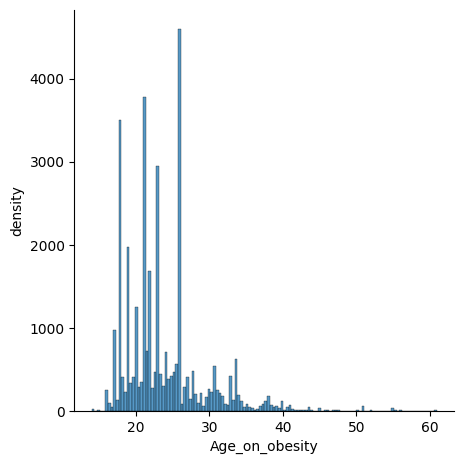

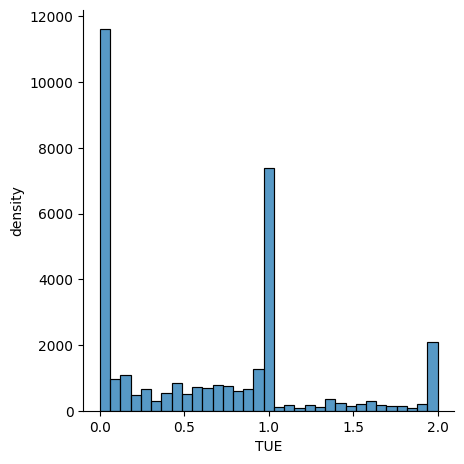

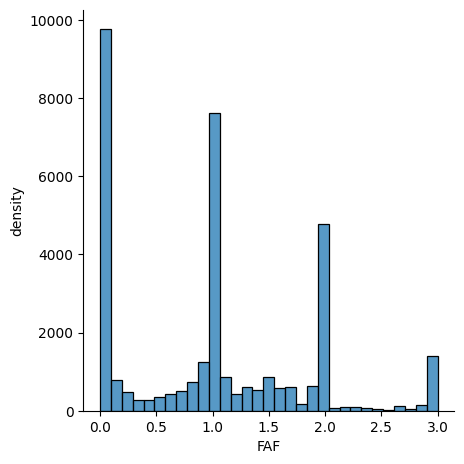

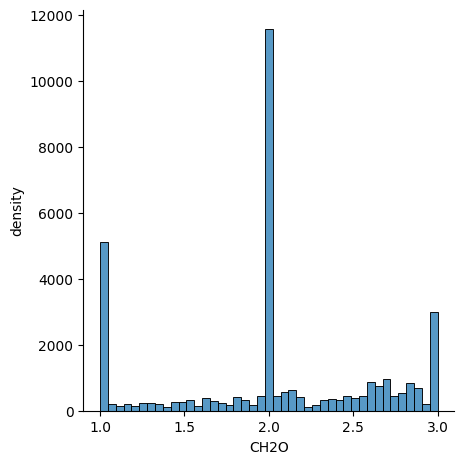

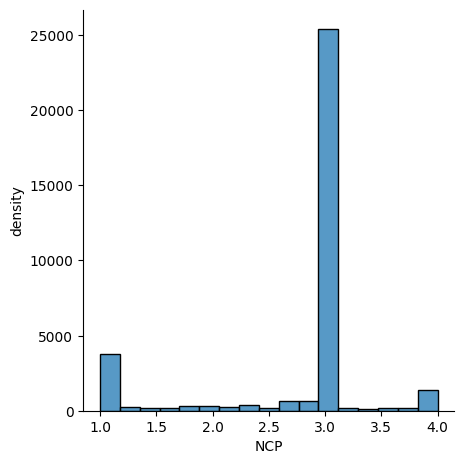

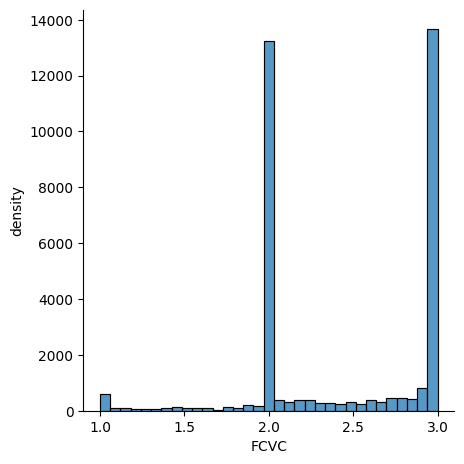

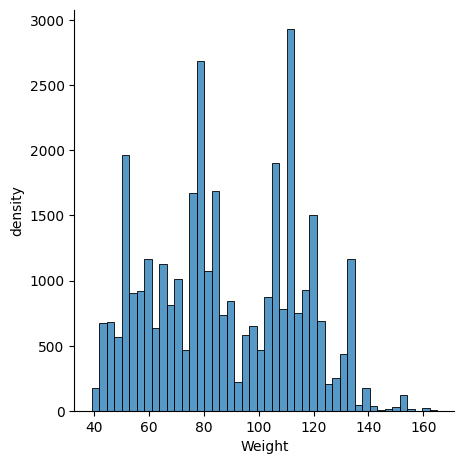

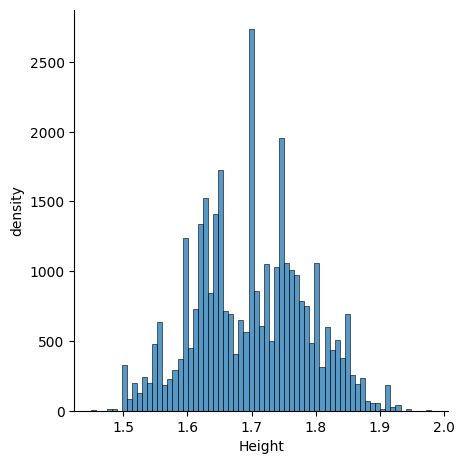

In [61]:
# Before scale numerical features let's see one more time its distribution
def Hist_vars(data, var_group):
    '''
    Histograms for variables
    Takes a group of variables ( INTEGER or FLOAT) and plot/print all the descriptives and properties along with KDE and histograms
    '''
    plt.figure(figsize=(12,8))
    #looping for each variable
    for j,i in enumerate(var_group):
        
        #Plotting the variable with every information

        sb.displot(x = data[i])
        plt.xlabel('{}'.format(i),fontsize = 10)
        plt.ylabel('density')
        base_cl = sb.color_palette()[0]
        #plt.legend(ncol = 2) # re-arrange legend to reduce overlapping"""
        plt.tight_layout(pad =2)
Hist_vars(data_f,num_vars)

In [62]:
print(data_f[num_vars].skew())

Age_on_obesity    1.445980
TUE               0.682085
FAF               0.514904
CH2O             -0.206969
NCP              -1.552479
FCVC             -0.351009
Weight            0.090870
Height            0.035495
dtype: float64


The `Age_on_obesity`,`TUE`,`FAF` distributions are strongly skewed at right.
The `CH2O`, `NCP` and `FCVC` distributions are skewed at left.

In [63]:
data_f[num_vars].describe()

Age_on_obesity           TUE           FAF          CH2O           NCP  \
count    34598.000000  34598.000000  34598.000000  34598.000000  34598.000000   
mean        23.695255      0.614467      0.978861      2.030469      2.757043   
std          5.328341      0.604475      0.839122      0.609566      0.707610   
min         14.000000      0.000000      0.000000      1.000000      1.000000   
25%         20.000000      0.000000      0.006892      1.784710      3.000000   
50%         22.851747      0.555591      1.000000      2.000000      3.000000   
75%         26.000000      1.000000      1.583832      2.550570      3.000000   
max         61.000000      2.000000      3.000000      3.000000      4.000000   

               FCVC        Weight        Height  
count  34598.000000  34598.000000  34598.000000  
mean       2.444704     87.686451      1.699721  
std        0.532568     26.273493      0.087895  
min        1.000000     39.000000      1.450000  
25%        2.000000     66.000000      1.631856  
50%        2.392179     84.000000      1.700000  
75%        3.000000    111.539494      1.761773  
max        3.000000    165.057269      1.980000

<Figure size 1200x800 with 0 Axes>

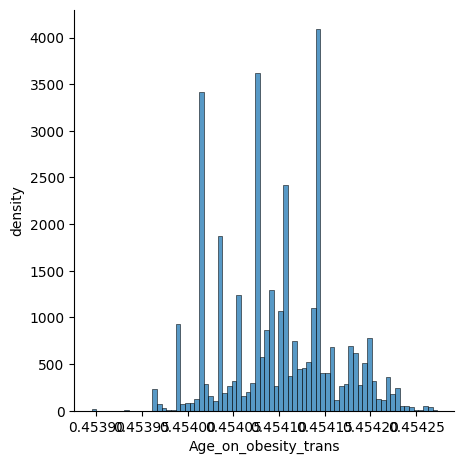

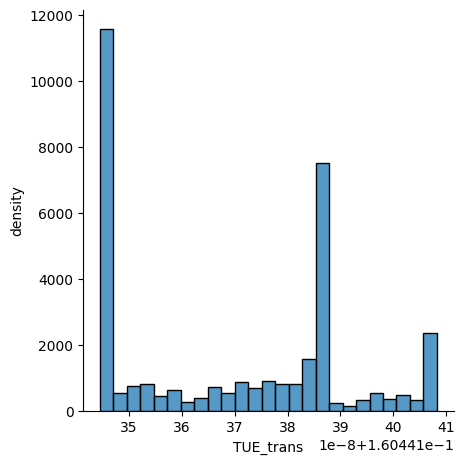

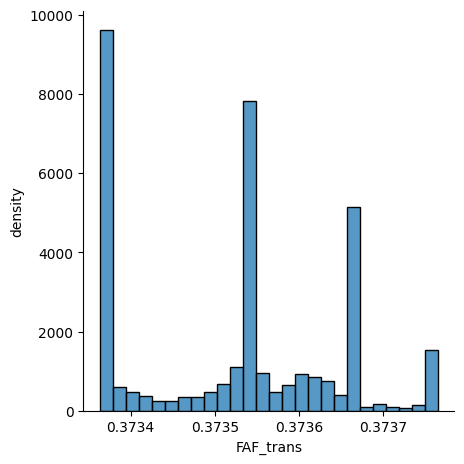

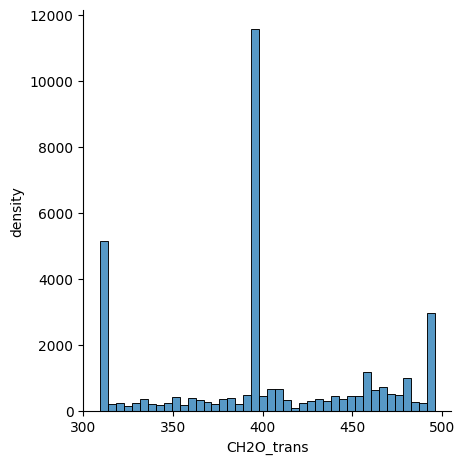

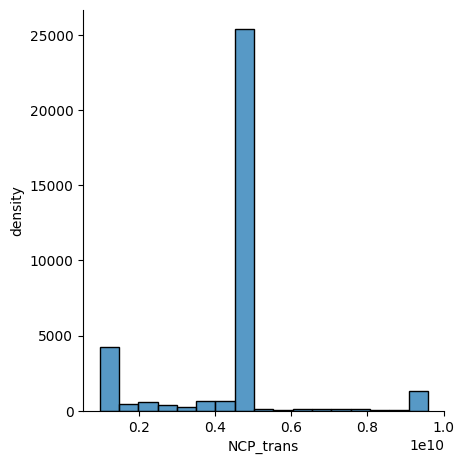

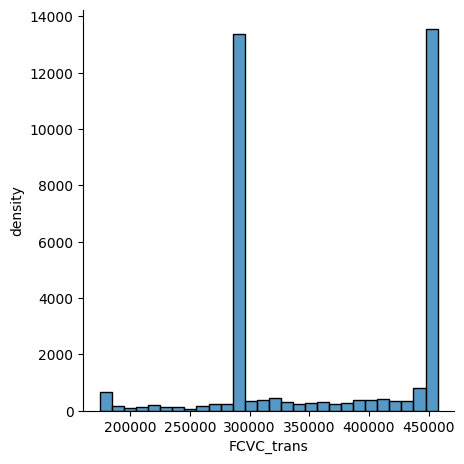

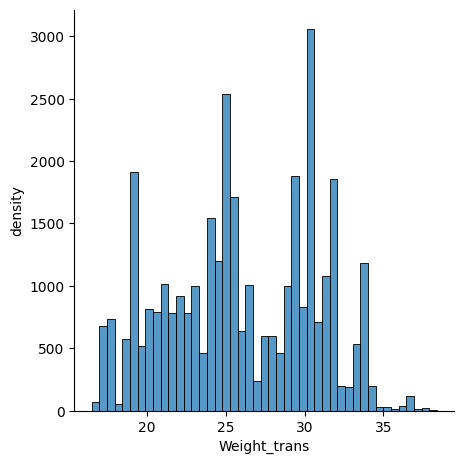

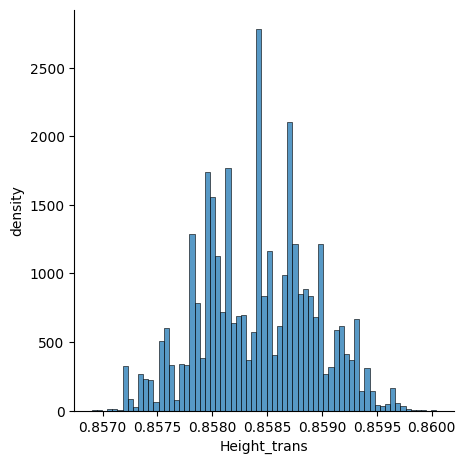

In [64]:
def Hist_bx_cx_vars(data, var_group):
    from scipy import stats
    '''
    Histograms for variables
    Takes a group of variables ( INTEGER or FLOAT) and plot/print all the descriptives and properties along with KDE and histograms
    '''
    plt.figure(figsize=(12,8))
    #looping for each variable
    for j,i in enumerate(var_group):
        
        #Plotting the variable with every information
        data[i+'trans'],data['i'+'lmda_val'] = stats.boxcox(abs(data[i]+10),lmbda = None )
        sb.displot(x = data[i+'trans'])
        plt.xlabel('{}_trans'.format(i),fontsize = 10)
        plt.ylabel('density')
        base_cl = sb.color_palette()[0]
        #plt.legend(ncol = 2) # re-arrange legend to reduce overlapping"""
        plt.tight_layout(pad =2)
Hist_bx_cx_vars(data_f,num_vars)

In [65]:
data_f.describe()

id        Height        Weight          FCVC           NCP  \
count  34598.000000  34598.000000  34598.000000  34598.000000  34598.000000   
mean   17298.500000      1.699721     87.686451      2.444704      2.757043   
std     9987.726643      0.087895     26.273493      0.532568      0.707610   
min        0.000000      1.450000     39.000000      1.000000      1.000000   
25%     8649.250000      1.631856     66.000000      2.000000      3.000000   
50%    17298.500000      1.700000     84.000000      2.392179      3.000000   
75%    25947.750000      1.761773    111.539494      3.000000      3.000000   
max    34597.000000      1.980000    165.057269      3.000000      4.000000   

               CAEC          CH2O           FAF           TUE          CALC  \
count  34598.000000  34598.000000  34598.000000  34598.000000  34598.000000   
mean       1.846552      2.030469      0.978861      0.614467      2.225360   
std        0.452257      0.609566      0.839122      0.604475      0.474876   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.784710      0.006892      0.000000      2.000000   
50%        2.000000      2.000000      1.000000      0.555591      2.000000   
75%        2.000000      2.550570      1.583832      1.000000      3.000000   
max        3.000000      3.000000      3.000000      2.000000      3.000000   

       ...       SCC_yes  Age_on_obesitytrans     ilmda_val      TUEtrans  \
count  ...  34598.000000         34598.000000  3.459800e+04  3.459800e+04   
mean   ...      0.033268             0.454099 -1.083938e+00  1.604414e-01   
std    ...      0.179338             0.000061  2.220478e-16  2.172946e-08   
min    ...      0.000000             0.453895 -1.083938e+00  1.604413e-01   
25%    ...      0.000000             0.454057 -1.083938e+00  1.604413e-01   
50%    ...      0.000000             0.454103 -1.083938e+00  1.604414e-01   
75%    ...      0.000000             0.454141 -1.083938e+00  1.604414e-01   
max    ...      1.000000             0.454273 -1.083938e+00  1.604414e-01   

           FAFtrans     CH2Otrans      NCPtrans      FCVCtrans   Weighttrans  \
count  34598.000000  34598.000000  3.459800e+04   34598.000000  34598.000000   
mean       0.373522    400.955300  4.356287e+09  364575.761000     25.981139   
std        0.000123     56.673505  1.694960e+09   85956.609644      4.704181   
min        0.373364    309.221208  9.550228e+08  174679.677922     16.507235   
25%        0.373365    375.745437  4.720029e+09  288450.075125     22.198421   
50%        0.373542    395.479445  4.720029e+09  347199.186343     25.566156   
75%        0.373622    448.956355  4.720029e+09  457565.407482     30.279223   
max        0.373764    495.906347  9.589236e+09  457565.407482     38.409982   

        Heighttrans  
count  34598.000000  
mean       0.858414  
std        0.000522  
min        0.856900  
25%        0.858012  
50%        0.858419  
75%        0.858784  
max        0.860043  

[8 rows x 33 columns]

# Model Building and Evaluation Metrics
Since this is a classification problem, we could use the following 2 metrics:

1. Accuracy
2. Classification report

## Baseline Columns

In [66]:
data_f.columns

Index(['id', 'Gender', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'patient_class', 'height_class',
       'Age_on_obesity', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'Age_on_obesitytrans', 'ilmda_val',
       'TUEtrans', 'FAFtrans', 'CH2Otrans', 'NCPtrans', 'FCVCtrans',
       'Weighttrans', 'Heighttrans'],
      dtype='object')

In [67]:
data = data_f[['id','CAEC','CALC','MTRANS','patient_class','height_class', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'Age_on_obesitytrans',
       'TUEtrans', 'FAFtrans', 'CH2Otrans', 'NCPtrans', 'FCVCtrans',
       'Weighttrans', 'Heighttrans','NObeyesdad']]

data.dtypes

id                                       int64
CAEC                                     int64
CALC                                     int64
MTRANS                                   int64
patient_class                            int64
height_class                             int64
Gender_Female                          float64
Gender_Male                            float64
family_history_with_overweight_no      float64
family_history_with_overweight_yes     float64
FAVC_no                                float64
FAVC_yes                               float64
SMOKE_no                               float64
SMOKE_yes                              float64
SCC_no                                 float64
SCC_yes                                float64
Age_on_obesitytrans                    float64
TUEtrans                               float64
FAFtrans                               float64
CH2Otrans                              float64
NCPtrans                               float64
FCVCtrans    

In [68]:
train = data.loc[:len(df_train)-1]
test = data.loc[len(df_train):]
print (data.shape, train.shape,test.shape)

(34598, 25) (20758, 25) (13840, 25)


In [69]:
test.head()

id  CAEC  CALC  MTRANS  patient_class  height_class  Gender_Female  \
20758  20758     2     2       3              0             0            0.0   
20759  20759     2     2       3              2             0            1.0   
20760  20760     2     2       3              0             0            1.0   
20761  20761     2     2       3              2             3            0.0   
20762  20762     2     2       3              0             0            1.0   

       Gender_Male  family_history_with_overweight_no  \
20758          1.0                                0.0   
20759          0.0                                0.0   
20760          0.0                                0.0   
20761          1.0                                0.0   
20762          0.0                                0.0   

       family_history_with_overweight_yes  ...  SCC_yes  Age_on_obesitytrans  \
20758                                 1.0  ...      0.0             0.454150   
20759                                 1.0  ...      0.0             0.454074   
20760                                 1.0  ...      0.0             0.454141   
20761                                 1.0  ...      0.0             0.454074   
20762                                 1.0  ...      0.0             0.454141   

       TUEtrans  FAFtrans   CH2Otrans      NCPtrans      FCVCtrans  \
20758  0.160441  0.373520  477.332365  4.720029e+09  445250.387206   
20759  0.160441  0.373542  495.906347  9.550228e+08  288450.075125   
20760  0.160441  0.373364  456.204998  4.720029e+09  457565.407482   
20761  0.160441  0.373383  473.218372  4.643868e+09  288450.075125   
20762  0.160441  0.373364  459.446807  4.720029e+09  457565.407482   

       Weighttrans  Heighttrans  NObeyesdad  
20758    31.745790     0.859289         NaN  
20759    22.198421     0.857820         NaN  
20760    30.289194     0.858081         NaN  
20761    28.977706     0.857535         NaN  
20762    29.172662     0.857985         NaN  

[5 rows x 25 columns]

In [70]:
train.head()

id  CAEC  CALC  MTRANS  patient_class  height_class  Gender_Female  \
0   0     2     2       3              2             1            0.0   
1   1     1     3       0              2             1            1.0   
2   2     2     3       3              2             0            1.0   
3   3     2     2       3              2             0            1.0   
4   4     2     2       3              0             2            0.0   

   Gender_Male  family_history_with_overweight_no  \
0          1.0                                0.0   
1          0.0                                0.0   
2          0.0                                0.0   
3          0.0                                0.0   
4          1.0                                0.0   

   family_history_with_overweight_yes  ...  SCC_yes  Age_on_obesitytrans  \
0                                 1.0  ...      0.0             0.454123   
1                                 1.0  ...      0.0             0.454015   
2                                 1.0  ...      0.0             0.454015   
3                                 1.0  ...      0.0             0.454073   
4                                 1.0  ...      0.0             0.454187   

   TUEtrans  FAFtrans   CH2Otrans      NCPtrans      FCVCtrans  Weighttrans  \
0  0.160441  0.373364  470.832242  4.662342e+09  288450.075125    25.144889   
1  0.160441  0.373542  395.479445  4.720029e+09  288450.075125    20.402081   
2  0.160441  0.373522  387.185237  1.357187e+09  272284.371531    18.976355   
3  0.160441  0.373607  365.855423  4.720029e+09  457565.407482    33.410172   
4  0.160441  0.373667  393.604553  2.145685e+09  396271.158429    27.296150   

   Heighttrans           NObeyesdad  
0     0.858419  Overweight_Level_II  
1     0.857577        Normal_Weight  
2     0.858487  Insufficient_Weight  
3     0.858483     Obesity_Type_III  
4     0.859668  Overweight_Level_II  

[5 rows x 25 columns]

In [71]:
y_all = train.NObeyesdad

### Variance inflation flator (VIF)(Checking for multi-colinearity)

In [72]:
# Importing variance_inflation_flator 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
data_c = data_f[['CAEC','CALC','MTRANS','patient_class','height_class', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'Age_on_obesitytrans',
       'TUEtrans', 'FAFtrans', 'CH2Otrans', 'NCPtrans', 'FCVCtrans',
       'Weighttrans', 'Heighttrans']]
#Calculating VIF for every column (not applicable for categorical variables)
VIF = pd.Series([variance_inflation_factor(data_c.values, i) for i in range(data_c.shape[1])], index = data_c.columns)
VIF

CAEC                                  1.188373e+00
CALC                                  1.103370e+00
MTRANS                                1.506270e+00
patient_class                         3.306248e+00
height_class                          1.107459e+00
Gender_Female                         1.000800e+15
Gender_Male                           9.007199e+15
family_history_with_overweight_no     8.830588e+12
family_history_with_overweight_yes    6.004800e+14
FAVC_no                               1.646654e+13
FAVC_yes                              5.925789e+13
SMOKE_no                              1.215546e+13
SMOKE_yes                             6.211862e+13
SCC_no                                6.433714e+14
SCC_yes                               3.251696e+13
Age_on_obesitytrans                   3.509989e+00
TUEtrans                              1.151312e+00
FAFtrans                              1.317453e+00
CH2Otrans                             1.149080e+00
NCPtrans                       

All seems good , there is no multicolinearity between our numerical variables. I don't take account of categorical variables as they come from categorical encoding.

### Train Test Split to create a validation set

In [73]:
train = train.drop(columns=['id','NObeyesdad'])
len(y_all), train.columns

(20758,
 Index(['CAEC', 'CALC', 'MTRANS', 'patient_class', 'height_class',
        'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
        'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
        'SMOKE_yes', 'SCC_no', 'SCC_yes', 'Age_on_obesitytrans', 'TUEtrans',
        'FAFtrans', 'CH2Otrans', 'NCPtrans', 'FCVCtrans', 'Weighttrans',
        'Heighttrans'],
       dtype='object'))

In [74]:
# Splitting the data into Train and Validation set

xtrain, xtest, ytrain, ytest = train_test_split(train,y_all,test_size=1/3, random_state=64, stratify = y_all,shuffle=True)

!pip install lazypredict 

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

In [75]:
import optuna

# Import libraries for gradient boosting
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

######## For this submission I will apply ensembles on LGBM Classifier, random forest and  Model to predict NObeyesdad value
####### LGBM     
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 80, 300,step=1),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 1, 11),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        #'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10.0),
        'reg_lambda':trial.suggest_float('reg_lambda', 0, 10.0),
        #'min_child_samples': trial.suggest_int('min_child_samples', 1, 9),
        'random_state':64,
        'objectif' : 'multiclass', 
        'num_class' : 7, 
        'metric' : 'multi_logloss',
        'verbose':-1
    
    }
    model = lgb.LGBMClassifier(**params)

    # Perform k-fold cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=64)
    scores = []
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold,)
        score = accuracy_score(y_val_fold, y_val_pred)
        scores.append(score)

    avg_score = sum(scores) / len(scores)

    return avg_score

### Split the data into train and validation sets
print(train.columns)
X_train, X_val, y_train, y_val = train_test_split(train, y_all, test_size = 1/3, random_state = 64)
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)
best_params = study.best_params
best_score = study.best_value

####### Rf   
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 80, 300,step=1),
        'max_depth': trial.suggest_int('max_depth', 1, 11),
        'random_state':64,
        'class_weight':'balanced'
    
    }
    model = RandomForestClassifier(**params)

    # Perform k-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=64)
    scores = []
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold,)
        score = accuracy_score(y_val_fold, y_val_pred)
        scores.append(score)

    avg_score = sum(scores) / len(scores)

    return avg_score

### Split the data into train and validation sets
print(train.columns)
X_train, X_val, y_train, y_val = train_test_split(train, y_all, test_size = 1/3, random_state = 64,stratify=y_all)
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)
best_params = study.best_params
best_score = study.best_value

In [76]:
y_all_en = le.fit_transform(y_all)
y_all_en = pd.DataFrame(y_all_en)
y_all_en

0
0      6
1      1
2      0
3      4
4      6
...   ..
20753  3
20754  0
20755  3
20756  6
20757  3

[20758 rows x 1 columns]

####### XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 80, 300, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'lambda': trial.suggest_float('lambda', 1e-5, 10),
        'alpha': trial.suggest_float('alpha', 1e-5, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1,11),
        'min_child_weight': trial.suggest_int('min_child_weight', 1,11),
        'eta': trial.suggest_float('eta', 1e-6, 1.0),
        'eval_metric':accuracy_score,
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'max_leaves': trial.suggest_int('max_leaves', 1,100),
        'max_bin': trial.suggest_int('max_bin', 2,100),
        'objective':'multi:softmax',
        'num_class':7
        
        

    }
    model = XGBClassifier(random_state=64, **params)

    # Perform k-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=64)
    scores = []
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold,)
        score = accuracy_score(y_val_fold, y_val_pred)
        scores.append(score)

    avg_score = sum(scores) / len(scores)

    return avg_score

### Split the data into train and validation sets
print(train.columns)
X_train, X_val, y_train, y_val = train_test_split(train, y_all_en, test_size = 1/3, random_state = 64,stratify=y_all)
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=200)
best_params = study.best_params
best_score = study.best_value

best_params

In [77]:
params1 = {'n_estimators': 133,
 'learning_rate': 0.11100296268077997,
 'lambda': 1.2652059838423075,
 'alpha': 2.264771480559496,
 'subsample': 0.6304952793937528,
 'colsample_bytree': 0.6478919387297335,
 'max_depth': 7,
 'min_child_weight': 7,
 'eta': 0.595651698274178,
 'gamma': 0.006687004538066588,
 'max_leaves': 62,
 'max_bin': 71,
 'eval_metric':f1_score,
 'objective':'multi:softmax',
 'num_class':7}

params2 = {'n_estimators': 294,
 'learning_rate': 0.0988999118136752,
 'lambda': 9.204485437027477,
 'alpha': 0.9900435708196457,
 'subsample': 0.7723636083671891,
 'colsample_bytree': 0.47852316420948243,
 'max_depth': 7,
 'min_child_weight': 8,
 'eta': 0.8299570833948281,
 'gamma': 0.4074251824768647,
 'max_leaves': 71,
 'max_bin': 78,
 'eval_metric':accuracy_score,
 'objective':'multi:softmax',
 'num_class':7}

In [78]:
#Classification report with one of these models

xgb_model1 = XGBClassifier(random_state=64,**params1)
xtrain, xtest, ytrain, ytest = train_test_split(train,y_all_en,test_size=1/3, random_state=64, stratify = y_all_en,shuffle=True)
xgb_model1.fit(xtrain,ytrain)
ypred_train = xgb_model1.predict(xtrain)
ypred_test = xgb_model1.predict(xtest)
print('Accuracy on Train set :{}\n'.format(accuracy_score(ytrain,ypred_train)))
print('Accuracy on Test set :{}\n'.format(accuracy_score(ytest,ypred_test)))
print (classification_report(ytest,ypred_test))

Accuracy on Train set :0.9414655297008239

Accuracy on Test set :0.919364161849711

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       841
           1       0.88      0.89      0.89      1027
           2       0.91      0.91      0.91       970
           3       0.97      0.97      0.97      1083
           4       1.00      1.00      1.00      1349
           5       0.85      0.81      0.83       809
           6       0.84      0.85      0.84       841

    accuracy                           0.92      6920
   macro avg       0.91      0.91      0.91      6920
weighted avg       0.92      0.92      0.92      6920



In [79]:
pred_1 = le.inverse_transform(ypred_test)
pred_1

array(['Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_III', ...,
       'Obesity_Type_III', 'Overweight_Level_II', 'Obesity_Type_III'],
      dtype=object)

In [80]:
#Classification report with one of these models

xgb_model2 = XGBClassifier(random_state=64,**params2)
xtrain, xtest, ytrain, ytest = train_test_split(train,y_all_en,test_size=1/3, random_state=64, stratify = y_all_en,shuffle=True)
xgb_model2.fit(xtrain,ytrain)
ypred_train = xgb_model2.predict(xtrain)
ypred_test = xgb_model2.predict(xtest)
print('Accuracy on Train set :{}\n'.format(accuracy_score(ytrain,ypred_train)))
print('Accuracy on Test set :{}\n'.format(accuracy_score(ytest,ypred_test)))
print (classification_report(ytest,ypred_test))

Accuracy on Train set :0.9418268535915595

Accuracy on Test set :0.922543352601156

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       841
           1       0.88      0.91      0.90      1027
           2       0.91      0.91      0.91       970
           3       0.97      0.97      0.97      1083
           4       1.00      1.00      1.00      1349
           5       0.86      0.81      0.84       809
           6       0.85      0.86      0.85       841

    accuracy                           0.92      6920
   macro avg       0.92      0.91      0.91      6920
weighted avg       0.92      0.92      0.92      6920



In [81]:
pred_2 = le.inverse_transform(ypred_test)
pred_2

array(['Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_III', ...,
       'Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_III'],
      dtype=object)

In [82]:
#Classification report with one of these models

rf_model = RandomForestClassifier(n_estimators=137, max_depth=11,random_state=64 ,class_weight='balanced')
xtrain, xtest, ytrain, ytest = train_test_split(train,y_all,test_size=1/3, random_state=64, stratify = y_all,shuffle=True)
rf_model.fit(xtrain,ytrain)
ypred_train = rf_model.predict(xtrain)
ypred_test = rf_model.predict(xtest)
print('Accuracy on Train set :{}\n'.format(accuracy_score(ytrain,ypred_train)))
print('Accuracy on Test set :{}\n'.format(accuracy_score(ytest,ypred_test)))
print (classification_report(ytest,ypred_test))

Accuracy on Train set :0.9489088018499783

Accuracy on Test set :0.8969653179190752

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.92       841
      Normal_Weight       0.84      0.85      0.84      1027
     Obesity_Type_I       0.90      0.87      0.88       970
    Obesity_Type_II       0.96      0.97      0.97      1083
   Obesity_Type_III       1.00      1.00      1.00      1349
 Overweight_Level_I       0.79      0.76      0.77       809
Overweight_Level_II       0.81      0.83      0.82       841

           accuracy                           0.90      6920
          macro avg       0.89      0.89      0.89      6920
       weighted avg       0.90      0.90      0.90      6920



In [83]:
pred_3 = ypred_test
pred_3

array(['Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_III', ...,
       'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_III'],
      dtype=object)

Best rf:{'n_estimators': 137, 'max_depth': 11}

Best LGBM: {'n_estimators': 230, 'learning_rate': 0.14881882031016508, 'max_depth': 3, 'num_leaves': 14, 'subsample': 0.48816547954904277, 'reg_alpha': 1.1671738480636913, 'reg_lambda': 4.083016043382141}

In [84]:
#Classification report with one of these models

lgb_model = lgb.LGBMClassifier(n_estimators=230,learning_rate=0.14881882031016508, max_depth=3,num_leaves=14,subsample=0.48816547954904277,reg_alpha=1.1671738480636913,reg_lambda=4.083016043382141,verbose =-1 ,random_state=64,num_class=7,metric = 'multi_logloss')
xtrain, xtest, ytrain, ytest = train_test_split(train,y_all,test_size=1/3, random_state=64, stratify = y_all,shuffle=True)
lgb_model.fit(xtrain,ytrain)
ypred_train = lgb_model.predict(xtrain)
ypred_test = lgb_model.predict(xtest)
print('Accuracy on Train set :{}\n'.format(accuracy_score(ytrain,ypred_train)))
print('Accuracy on Test set :{}\n'.format(accuracy_score(ytest,ypred_test)))
print (classification_report(ytest,ypred_test))

Accuracy on Train set :0.9517993929758636

Accuracy on Test set :0.925

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94       841
      Normal_Weight       0.89      0.90      0.90      1027
     Obesity_Type_I       0.92      0.91      0.92       970
    Obesity_Type_II       0.98      0.98      0.98      1083
   Obesity_Type_III       1.00      1.00      1.00      1349
 Overweight_Level_I       0.86      0.81      0.84       809
Overweight_Level_II       0.84      0.86      0.85       841

           accuracy                           0.93      6920
          macro avg       0.92      0.92      0.92      6920
       weighted avg       0.92      0.93      0.92      6920



In [85]:
pred_4 = ypred_test
pred_4

array(['Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_III', ...,
       'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_III'],
      dtype=object)

## Ensemble building 
I will proceed by averaging.(Voting based on mode in this classification)

In [86]:
from itertools import combinations

In [87]:

pred_models = [pred_1,pred_2,pred_3,pred_4]
var_2_predict = list(combinations([i for i in range(4)],2))
var_3_predict = list(combinations([i for i in range(4)],3))
var_4_predict = list(combinations([i for i in range(4)],4))
var_pred = var_2_predict+var_3_predict+var_4_predict


In [88]:
from statistics import mode
model_names = ['xgb1','xgb2','rf','lgb']
predictions = [pred_1,pred_2,pred_3,pred_4]

acc_scores = []
comb_name = []
for i, j in enumerate(var_pred):
    final_pred = np.array([])
    for k in range(0,len(xtest)):
        final_pred = np.append(final_pred, mode([predictions[var_pred[i][l]][k] for l in range(len(var_pred[i]))]))
    comb_name.append('Combi_'+str(i))
    print(accuracy_score(ytest,final_pred))
    acc_scores.append(accuracy_score(ytest,final_pred))

0.919364161849711
0.919364161849711
0.919364161849711
0.922543352601156
0.922543352601156
0.8969653179190752
0.9209537572254335
0.9226878612716763
0.922543352601156
0.9239884393063584
0.9213872832369943


In [89]:
Recap = {'model': comb_name,
         'accuracy': acc_scores}
resume_models = pd.DataFrame(data=Recap, columns = ['model','accuracy'])
resume_models.sort_values(by ='accuracy', ascending = False)

model  accuracy
9    Combi_9  0.923988
7    Combi_7  0.922688
3    Combi_3  0.922543
4    Combi_4  0.922543
8    Combi_8  0.922543
10  Combi_10  0.921387
6    Combi_6  0.920954
0    Combi_0  0.919364
1    Combi_1  0.919364
2    Combi_2  0.919364
5    Combi_5  0.896965

In [90]:
name_2_models = list(combinations(model_names,2))
name_3_models = list(combinations(model_names,3))
name_4_models = list(combinations(model_names,4))
name_models = name_2_models + name_3_models + name_4_models
ensembles = []
for i,j in enumerate(name_models):
    ensembles.append(' & '.join (name_models[i]))
resume_models['ensemble'] = ensembles
resume_models.sort_values(by ='accuracy',ascending =False)

model  accuracy                ensemble
9    Combi_9  0.923988         xgb2 & rf & lgb
7    Combi_7  0.922688       xgb1 & xgb2 & lgb
3    Combi_3  0.922543               xgb2 & rf
4    Combi_4  0.922543              xgb2 & lgb
8    Combi_8  0.922543         xgb1 & rf & lgb
10  Combi_10  0.921387  xgb1 & xgb2 & rf & lgb
6    Combi_6  0.920954        xgb1 & xgb2 & rf
0    Combi_0  0.919364             xgb1 & xgb2
1    Combi_1  0.919364               xgb1 & rf
2    Combi_2  0.919364              xgb1 & lgb
5    Combi_5  0.896965                rf & lgb

So let's predict.

In [91]:
train.columns

Index(['CAEC', 'CALC', 'MTRANS', 'patient_class', 'height_class',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'Age_on_obesitytrans', 'TUEtrans',
       'FAFtrans', 'CH2Otrans', 'NCPtrans', 'FCVCtrans', 'Weighttrans',
       'Heighttrans'],
      dtype='object')

In [92]:
test.columns

Index(['id', 'CAEC', 'CALC', 'MTRANS', 'patient_class', 'height_class',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'Age_on_obesitytrans', 'TUEtrans',
       'FAFtrans', 'CH2Otrans', 'NCPtrans', 'FCVCtrans', 'Weighttrans',
       'Heighttrans', 'NObeyesdad'],
      dtype='object')

In [93]:
test_to_model = test.drop(columns=['id','NObeyesdad'])
test_to_model.columns

Index(['CAEC', 'CALC', 'MTRANS', 'patient_class', 'height_class',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'Age_on_obesitytrans', 'TUEtrans',
       'FAFtrans', 'CH2Otrans', 'NCPtrans', 'FCVCtrans', 'Weighttrans',
       'Heighttrans'],
      dtype='object')

In [94]:
#Predictions of models 
pred_xgb2 = xgb_model2.predict(test_to_model)
pred_xgb2 = le.inverse_transform(pred_xgb2)
pred_rf = rf_model.predict(test_to_model)
pred_lgb = lgb_model.predict(test_to_model)

predictions = [pred_xgb2,pred_rf,pred_lgb]
final_pred_test = np.array([])

for k in range(len(test)):
    final_pred_test = np.append(final_pred_test, mode([predictions[l][k] for l in range(len(predictions))]))
final_pred_test

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype='<U32')

In [95]:
test['NObeyesdad'] = final_pred_test
submission = test [['id','NObeyesdad']]
submission.head()

id          NObeyesdad
20758  20758     Obesity_Type_II
20759  20759  Overweight_Level_I
20760  20760    Obesity_Type_III
20761  20761      Obesity_Type_I
20762  20762    Obesity_Type_III

In [96]:
submission.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       2624
Overweight_Level_II    2340
Obesity_Type_II        2143
Normal_Weight          2123
Insufficient_Weight    1725
Obesity_Type_I         1675
Overweight_Level_I     1210
Name: count, dtype: int64

In [97]:
submission.to_csv('./submission.csv',index = False)